# Credit Card Users Churn Prediction

## Problem Statement

### Business Context

The Thera bank recently saw a steep decline in the number of users of their credit card, credit cards are a good source of income for banks because of different kinds of fees charged by the banks like annual fees, balance transfer fees, and cash advance fees, late payment fees, foreign transaction fees, and others. Some fees are charged to every user irrespective of usage, while others are charged under specified circumstances.

Customers’ leaving credit cards services would lead bank to loss, so the bank wants to analyze the data of customers and identify the customers who will leave their credit card services and reason for same – so that bank could improve upon those areas

You as a Data scientist at Thera bank need to come up with a classification model that will help the bank improve its services so that customers do not renounce their credit cards

### Data Description

* CLIENTNUM: Client number. Unique identifier for the customer holding the account
* Attrition_Flag: Internal event (customer activity) variable - if the account is closed then "Attrited Customer" else "Existing Customer"
* Customer_Age: Age in Years
* Gender: Gender of the account holder
* Dependent_count: Number of dependents
* Education_Level: Educational Qualification of the account holder - Graduate, High School, Unknown, Uneducated, College(refers to college student), Post-Graduate, Doctorate
* Marital_Status: Marital Status of the account holder
* Income_Category: Annual Income Category of the account holder
* Card_Category: Type of Card
* Months_on_book: Period of relationship with the bank (in months)
* Total_Relationship_Count: Total no. of products held by the customer
* Months_Inactive_12_mon: No. of months inactive in the last 12 months
* Contacts_Count_12_mon: No. of Contacts in the last 12 months
* Credit_Limit: Credit Limit on the Credit Card
* Total_Revolving_Bal: Total Revolving Balance on the Credit Card
* Avg_Open_To_Buy: Open to Buy Credit Line (Average of last 12 months)
* Total_Amt_Chng_Q4_Q1: Change in Transaction Amount (Q4 over Q1)
* Total_Trans_Amt: Total Transaction Amount (Last 12 months)
* Total_Trans_Ct: Total Transaction Count (Last 12 months)
* Total_Ct_Chng_Q4_Q1: Change in Transaction Count (Q4 over Q1)
* Avg_Utilization_Ratio: Average Card Utilization Ratio

#### What Is a Revolving Balance?

- If we don't pay the balance of the revolving credit account in full every month, the unpaid portion carries over to the next month. That's called a revolving balance


##### What is the Average Open to buy?

- 'Open to Buy' means the amount left on your credit card to use. Now, this column represents the average of this value for the last 12 months.

##### What is the Average utilization Ratio?

- The Avg_Utilization_Ratio represents how much of the available credit the customer spent. This is useful for calculating credit scores.


##### Relation b/w Avg_Open_To_Buy, Credit_Limit and Avg_Utilization_Ratio:

- ( Avg_Open_To_Buy / Credit_Limit ) + Avg_Utilization_Ratio = 1

### **Please read the instructions carefully before starting the project.**
This is a commented Jupyter IPython Notebook file in which all the instructions and tasks to be performed are mentioned.
* Blanks '_______' are provided in the notebook that
needs to be filled with an appropriate code to get the correct result. With every '_______' blank, there is a comment that briefly describes what needs to be filled in the blank space.
* Identify the task to be performed correctly, and only then proceed to write the required code.
* Fill the code wherever asked by the commented lines like "# write your code here" or "# complete the code". Running incomplete code may throw error.
* Please run the codes in a sequential manner from the beginning to avoid any unnecessary errors.
* Add the results/observations (wherever mentioned) derived from the analysis in the presentation and submit the same.


## Importing necessary libraries

In [1]:
# Installing the libraries with the specified version.
# uncomment and run the following line if Google Colab is being used
# !pip install scikit-learn==1.2.2 seaborn==0.13.1 matplotlib==3.7.1 numpy==1.25.2 pandas==1.5.3 imbalanced-learn==0.10.1 xgboost==2.0.3 -q --user

In [2]:
# Installing the libraries with the specified version.
# uncomment and run the following lines if Jupyter Notebook is being used
# !pip install scikit-learn==1.2.2 seaborn==0.13.1 matplotlib==3.7.1 numpy==1.25.2 pandas==1.5.3 imblearn==0.12.0 xgboost==2.0.3 -q --user
# !pip install --upgrade -q threadpoolctl

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again*.

In [3]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# To suppress scientific notations
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# Libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# To tune model, get different metric scores, and split data
from sklearn import metrics
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
)
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score

# To be used for data scaling and one hot encoding
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder

# To impute missing values
from sklearn.impute import SimpleImputer

# To oversample and undersample data
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# To do hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV

# To define maximum number of columns to be displayed in a dataframe
pd.set_option("display.max_columns", None)

# To supress scientific notations for a dataframe
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# To help with model building
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,
    BaggingClassifier,
)
from xgboost import XGBClassifier

# To supress warnings
import warnings
warnings.filterwarnings("ignore")

## Loading the dataset

In [4]:
# # Importing the drive module from google.colab package
# from google.colab import drive

# # Mounting the Google Drive to the /content/drive directory
# # This allows access to the files stored in your Google Drive
# drive.mount('/content/drive')

In [5]:
# Reading the CSV file from the specified path into a DataFrame
churn = pd.read_csv('./BankChurners.csv')

## Data Overview

- Observations
- Sanity checks

In [6]:
# Create a copy of the DataFrame 'churn' and assign it to the variable 'df'
df = churn.copy()

### Checking the shape of the dataset

In [7]:
# Checking the number of rows and columns in the data
churn.shape

(10127, 21)

* The dataset has 10127 rows and 21 columns

### Displaying the first and last few rows of the dataset

In [8]:
# Display the first five rows
df.head()

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0  768805383  Existing Customer            45      M                3   
1  818770008  Existing Customer            49      F                5   
2  713982108  Existing Customer            51      M                3   
3  769911858  Existing Customer            40      F                4   
4  709106358  Existing Customer            40      M                3   

  Education_Level Marital_Status Income_Category Card_Category  \
0     High School        Married     $60K - $80K          Blue   
1        Graduate         Single  Less than $40K          Blue   
2        Graduate        Married    $80K - $120K          Blue   
3     High School            NaN  Less than $40K          Blue   
4      Uneducated        Married     $60K - $80K          Blue   

   Months_on_book  Total_Relationship_Count  Months_Inactive_12_mon  \
0              39                         5                       1   
1              44                         6                       1   
2              36                         4                       1   
3              34                         3                       4   
4              21                         5                       1   

   Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  \
0                      3     12691.000                  777        11914.000   
1                      2      8256.000                  864         7392.000   
2                      0      3418.000                    0         3418.000   
3                      1      3313.000                 2517          796.000   
4                      0      4716.000                    0         4716.000   

   Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  \
0                 1.335             1144              42                1.625   
1                 1.541             1291              33                3.714   
2                 2.594             1887              20                2.333   
3                 1.405             1171              20                2.333   
4                 2.175              816              28                2.500   

   Avg_Utilization_Ratio  
0                  0.061  
1                  0.105  
2                  0.000  
3                  0.760  
4                  0.000

In [9]:
# Display the last five rows
df.tail()

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
10122  772366833  Existing Customer            50      M                2   
10123  710638233  Attrited Customer            41      M                2   
10124  716506083  Attrited Customer            44      F                1   
10125  717406983  Attrited Customer            30      M                2   
10126  714337233  Attrited Customer            43      F                2   

      Education_Level Marital_Status Income_Category Card_Category  \
10122        Graduate         Single     $40K - $60K          Blue   
10123             NaN       Divorced     $40K - $60K          Blue   
10124     High School        Married  Less than $40K          Blue   
10125        Graduate            NaN     $40K - $60K          Blue   
10126        Graduate        Married  Less than $40K        Silver   

       Months_on_book  Total_Relationship_Count  Months_Inactive_12_mon  \
10122              40                         3                       2   
10123              25                         4                       2   
10124              36                         5                       3   
10125              36                         4                       3   
10126              25                         6                       2   

       Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  \
10122                      3      4003.000                 1851   
10123                      3      4277.000                 2186   
10124                      4      5409.000                    0   
10125                      3      5281.000                    0   
10126                      4     10388.000                 1961   

       Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
10122         2152.000                 0.703            15476             117   
10123         2091.000                 0.804             8764              69   
10124         5409.000                 0.819            10291              60   
10125         5281.000                 0.535             8395              62   
10126         8427.000                 0.703            10294              61   

       Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
10122                0.857                  0.462  
10123                0.683                  0.511  
10124                0.818                  0.000  
10125                0.722                  0.000  
10126                0.649                  0.189

### Checking the data types of the columns for the dataset

In [10]:
# Checking the dat types of the columns in the dataset
df.info()

# Checking number of object data types
print("_"*15,f"Number of object data types", "_"*15)
print((df.dtypes == object).value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           8608 non-null   object 
 6   Marital_Status            9378 non-null   object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

* There are 21 columns in the dataset, 15 Numerical datatype and 6 Object datatype
* There are null values in the Education_Level and Marital_Status

### Checking for duplicate values

In [11]:
# Count the number of duplicate rows in the DataFrame
df.duplicated().sum()

0

* There are no duplicated row

### Checking for missing values

In [12]:
# Count the number of missing (null) values in each column
df.isnull().sum()

CLIENTNUM                      0
Attrition_Flag                 0
Customer_Age                   0
Gender                         0
Dependent_count                0
Education_Level             1519
Marital_Status               749
Income_Category                0
Card_Category                  0
Months_on_book                 0
Total_Relationship_Count       0
Months_Inactive_12_mon         0
Contacts_Count_12_mon          0
Credit_Limit                   0
Total_Revolving_Bal            0
Avg_Open_To_Buy                0
Total_Amt_Chng_Q4_Q1           0
Total_Trans_Amt                0
Total_Trans_Ct                 0
Total_Ct_Chng_Q4_Q1            0
Avg_Utilization_Ratio          0
dtype: int64

In [13]:
# Calculate the percentage of missing (null) values for each column
round(df.isnull().sum() / df.isnull().count() * 100, 2)

CLIENTNUM                   0.000
Attrition_Flag              0.000
Customer_Age                0.000
Gender                      0.000
Dependent_count             0.000
Education_Level            15.000
Marital_Status              7.400
Income_Category             0.000
Card_Category               0.000
Months_on_book              0.000
Total_Relationship_Count    0.000
Months_Inactive_12_mon      0.000
Contacts_Count_12_mon       0.000
Credit_Limit                0.000
Total_Revolving_Bal         0.000
Avg_Open_To_Buy             0.000
Total_Amt_Chng_Q4_Q1        0.000
Total_Trans_Amt             0.000
Total_Trans_Ct              0.000
Total_Ct_Chng_Q4_Q1         0.000
Avg_Utilization_Ratio       0.000
dtype: float64

* `Education_Level` has 15% missing values out of the total observations.
* `Marital_Status` has 7.4% missing values out of the total observations.
* Will impute these values after spliting the data into train, validation and test sets.

### Statistical summary of the dataset

In [14]:
# Generate descriptive statistics for the DataFrame and transpose the result
df.describe().T

count          mean          std           min  \
CLIENTNUM                10127.000 739177606.334 36903783.450 708082083.000   
Customer_Age             10127.000        46.326        8.017        26.000   
Dependent_count          10127.000         2.346        1.299         0.000   
Months_on_book           10127.000        35.928        7.986        13.000   
Total_Relationship_Count 10127.000         3.813        1.554         1.000   
Months_Inactive_12_mon   10127.000         2.341        1.011         0.000   
Contacts_Count_12_mon    10127.000         2.455        1.106         0.000   
Credit_Limit             10127.000      8631.954     9088.777      1438.300   
Total_Revolving_Bal      10127.000      1162.814      814.987         0.000   
Avg_Open_To_Buy          10127.000      7469.140     9090.685         3.000   
Total_Amt_Chng_Q4_Q1     10127.000         0.760        0.219         0.000   
Total_Trans_Amt          10127.000      4404.086     3397.129       510.000   
Total_Trans_Ct           10127.000        64.859       23.473        10.000   
Total_Ct_Chng_Q4_Q1      10127.000         0.712        0.238         0.000   
Avg_Utilization_Ratio    10127.000         0.275        0.276         0.000   

                                   25%           50%           75%  \
CLIENTNUM                713036770.500 717926358.000 773143533.000   
Customer_Age                    41.000        46.000        52.000   
Dependent_count                  1.000         2.000         3.000   
Months_on_book                  31.000        36.000        40.000   
Total_Relationship_Count         3.000         4.000         5.000   
Months_Inactive_12_mon           2.000         2.000         3.000   
Contacts_Count_12_mon            2.000         2.000         3.000   
Credit_Limit                  2555.000      4549.000     11067.500   
Total_Revolving_Bal            359.000      1276.000      1784.000   
Avg_Open_To_Buy               1324.500      3474.000      9859.000   
Total_Amt_Chng_Q4_Q1             0.631         0.736         0.859   
Total_Trans_Amt               2155.500      3899.000      4741.000   
Total_Trans_Ct                  45.000        67.000        81.000   
Total_Ct_Chng_Q4_Q1              0.582         0.702         0.818   
Avg_Utilization_Ratio            0.023         0.176         0.503   

                                   max  
CLIENTNUM                828343083.000  
Customer_Age                    73.000  
Dependent_count                  5.000  
Months_on_book                  56.000  
Total_Relationship_Count         6.000  
Months_Inactive_12_mon           6.000  
Contacts_Count_12_mon            6.000  
Credit_Limit                 34516.000  
Total_Revolving_Bal           2517.000  
Avg_Open_To_Buy              34516.000  
Total_Amt_Chng_Q4_Q1             3.397  
Total_Trans_Amt              18484.000  
Total_Trans_Ct                 139.000  
Total_Ct_Chng_Q4_Q1              3.714  
Avg_Utilization_Ratio            0.999

**Observations**
* `CLIENTNUM:` It is a unique identifier doesn't add any meaning to the analysis and can be dropped.
* `Customer_Age:` Customers have the average age of around 46 years old and Median of 46.00 years old. The youngest customer has 26 years old and the oldest has 73 years old.
* `Dependent_count:` On average each customer has around 2 dependents the Median is 2 dependents the Min is 0 dependents and the Max is 5 dependents.
* `Months_on_book:` On average Period of relationship with the bank for customers is around 36 months, the Median is around 36 months too, The min is 13 months and the max is 56 months.
* `Total_Relationship_Count:` The average for Total no. of products held by the customer is around 4 and the Median is around 4, The min is 1 nad the max is 6.
* `Months_Inactive_12_mon:` The average for No. of months inactive in the last 12 months is around 2 months the median is 2 months, the max is the max is 6 months and the min is 0 months.
* `Contacts_Count_12_mon:` In the last 12 months in average each customer had around 2.5 contacts with the bank. the median is 2 contacts and the max is 6 contact. there are cusomers with 0 contacts in the last 12 months.
* `Credit_Limit:` The average credit limit is around 8632 USD(the currency was not mentioned in the problem statement. In real world we have the currency. I will assume it as USD) the median is around 4549 USD, The min is around 1438 USD and the max is 34526 USD, It is a right skewed distribution.
* `Total_Revolving_Bal:` The average for Total Revolving Balance on the Credit Card is 1162.814 the Median is 1276 and the max is 2517 the min is 0.
* `Avg_Open_To_Buy:` The Mean is 7469.140 the Median is 3474 and Max is 34516 the min is 3. we have an exreme wide range, it could be some outliers
* `Total_Amt_Chng_Q4_Q1:` The Mean change is 0.760 and Median is 0.736 which is close to mean. 75% is 0.895 that has big difference by the max which is 3.297.
* `Total_Trans_Amt:` Average transaction amount of last 12 months is around 4404, The median is around 3899. the range between min(510) and max(18484) is huge.
* `Total_Trans_Ct:` On average customers transaction count is around 64 and median is 67. min is 10 and max is 139
* `Total_Ct_Chng_Q4_Q1:` On average transaction count change is 0.712 wiht min of 0 and max of 3.714
* `Avg_Utilization_Ratio:` On average utilization ratio is 0.275 and min is 0 and max is near 1.

In [15]:
# Generate descriptive statistics for object (string) columns and transpose the result
df.describe(include=["object"]).T

count unique                top  freq
Attrition_Flag   10127      2  Existing Customer  8500
Gender           10127      2                  F  5358
Education_Level   8608      6           Graduate  3128
Marital_Status    9378      3            Married  4687
Income_Category  10127      6     Less than $40K  3561
Card_Category    10127      4               Blue  9436

In [16]:
# Iterate over each column in the DataFrame that has object data type
for i in df.describe(include=["object"]).columns:
    print("*" * 20, "*" *len(" Unique values in "+i), "*" * 20, sep='')
    print("*" * 20, " Unique values in ", i," ", "*" * 20, sep='')
    print(f"{df[i].value_counts()}")
    print("**","Percentage of unique values in ", i,"**")
    print(f"{df[i].value_counts(normalize=True)*100}")

************************************************************************
******************** Unique values in Attrition_Flag ********************
Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64
** Percentage of unique values in  Attrition_Flag **
Existing Customer   83.934
Attrited Customer   16.066
Name: Attrition_Flag, dtype: float64
****************************************************************
******************** Unique values in Gender ********************
F    5358
M    4769
Name: Gender, dtype: int64
** Percentage of unique values in  Gender **
F   52.908
M   47.092
Name: Gender, dtype: float64
*************************************************************************
******************** Unique values in Education_Level ********************
Graduate         3128
High School      2013
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: Education_Level, dtype: int64
** Percentage of unique values 

**Observations**
* Around 84% are existing customers.
* Around 53% of customers are females
* Around 17% of customers are uneducated.
* Around 49% are married,  42% are single and 7% are divorced
* 35% of customers has less than $40k income, there is a category with the name of "abc" which should be treated.
* Most customers have a blue card.(93%)
* The target is imbalanced.

In [17]:
# CLIENTNUM consists of uniques ID for clients and hence will not add value to the modeling
df.drop(["CLIENTNUM"], axis=1, inplace=True)

* We will do missing value imputation after splitting the data into train, test and validation to avoid data leakage

In [18]:
data = df.copy()

In [19]:
# Encoding Existing and Attrited customers to 0 and 1 respectively, for analysis.
data["Attrition_Flag"].replace("Existing Customer", 0, inplace=True)
data["Attrition_Flag"].replace("Attrited Customer", 1, inplace=True)

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. How is the total transaction amount distributed?
2. What is the distribution of the level of education of customers?
3. What is the distribution of the level of income of customers?
4. How does the change in transaction amount between Q4 and Q1 (`total_ct_change_Q4_Q1`) vary by the customer's account status (`Attrition_Flag`)?
5. How does the number of months a customer was inactive in the last 12 months (`Months_Inactive_12_mon`) vary by the customer's account status (`Attrition_Flag`)?
6. What are the attributes that have a strong correlation with each other?



#### The below functions need to be defined to carry out the Exploratory Data Analysis.

In [20]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [21]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [22]:
# function to plot stacked bar chart

def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

In [23]:
### Function to plot distributions

def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

### Univariate analysis

`Customer_Age`

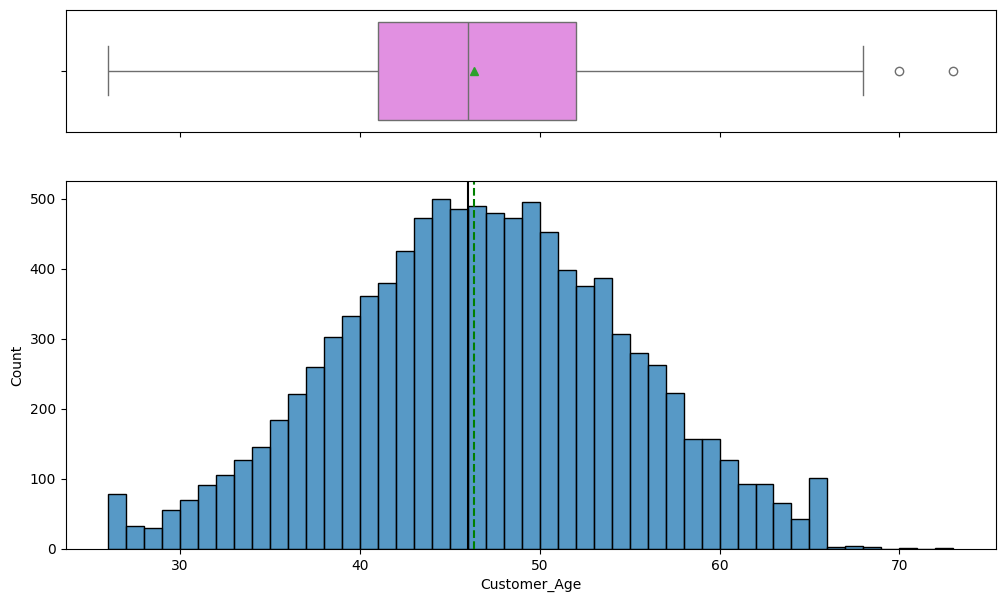

In [24]:
# Observations on Customer_age
histogram_boxplot(df, "Customer_Age")

* The distribution of age is uniform
* There are some high outliers

`Months_on_book`

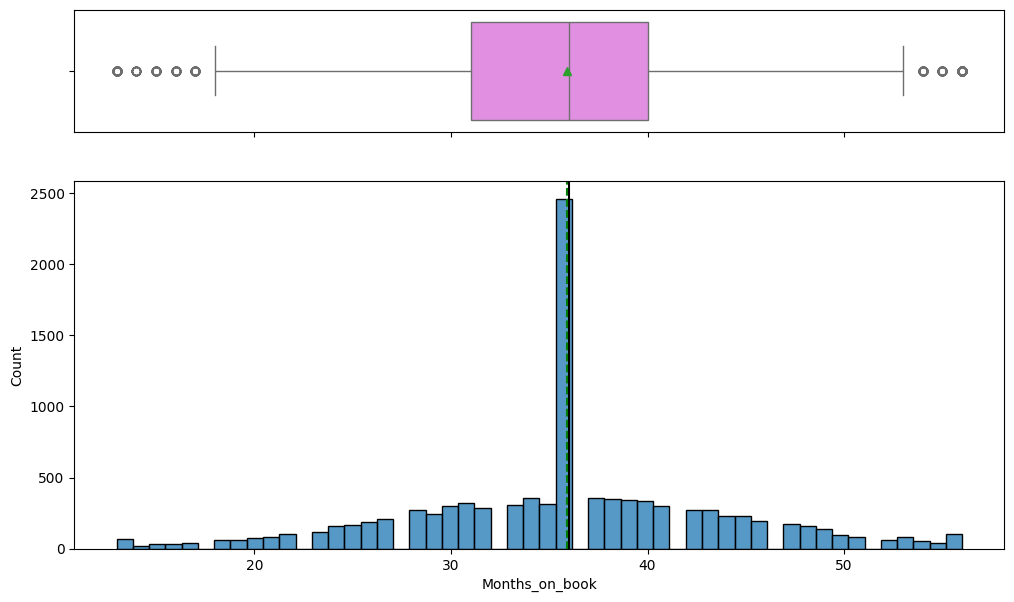

In [25]:
histogram_boxplot(df, 'Months_on_book')

* There are high and low outliters

`Credit_Limit`

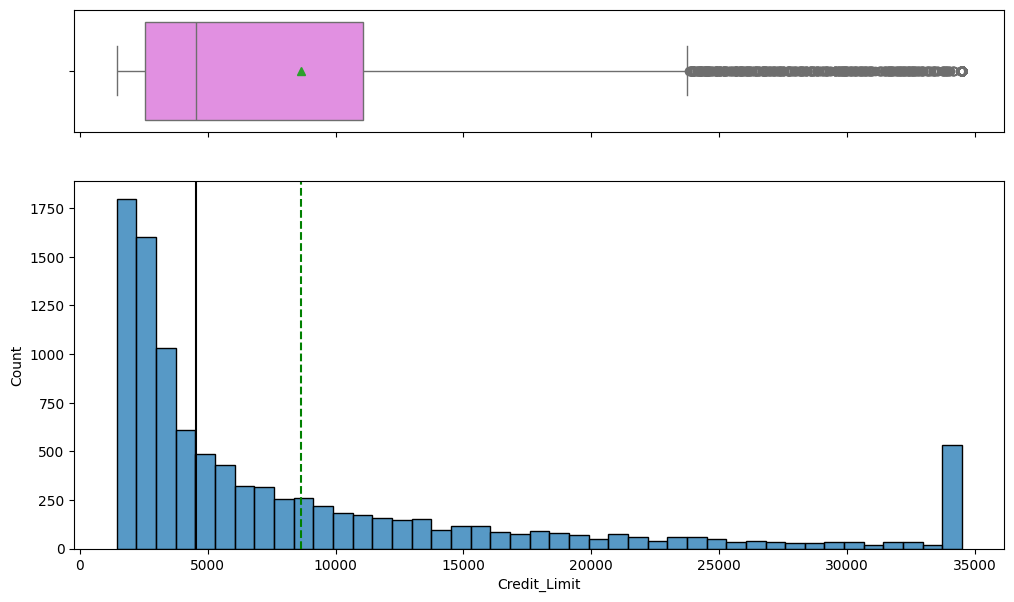

In [26]:
# Observations on Credit_Limit
histogram_boxplot(df, "Credit_Limit")

* there are high outliers in credit_limit

`Total_Revolving_Bal`

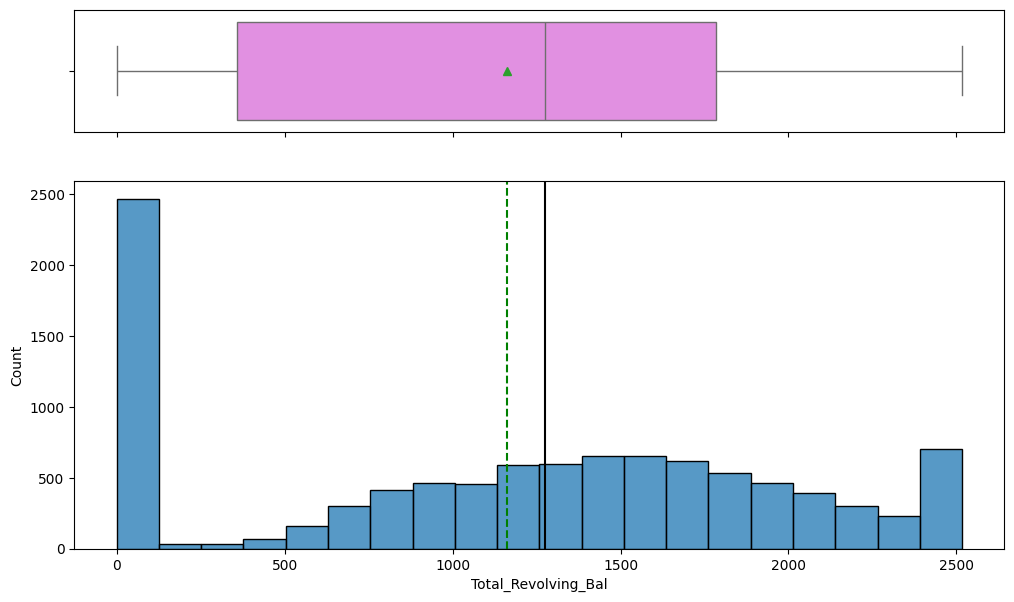

In [27]:
# Observations on Total_Revolving_Bal
histogram_boxplot(df, "Total_Revolving_Bal")

* There are no outliers

`Avg_Open_To_Buy`

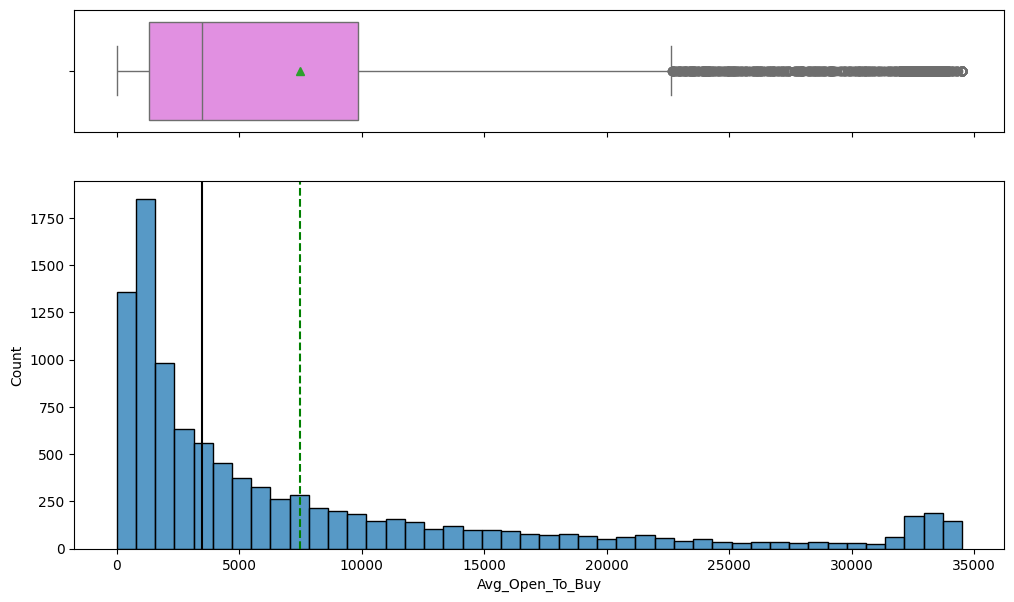

In [28]:
# Observations on Avg_Open_To_Buy
histogram_boxplot(df, "Avg_Open_To_Buy")

* There a lot of high outliers.
* The distribution is right skewed.

`Total_Trans_Ct`

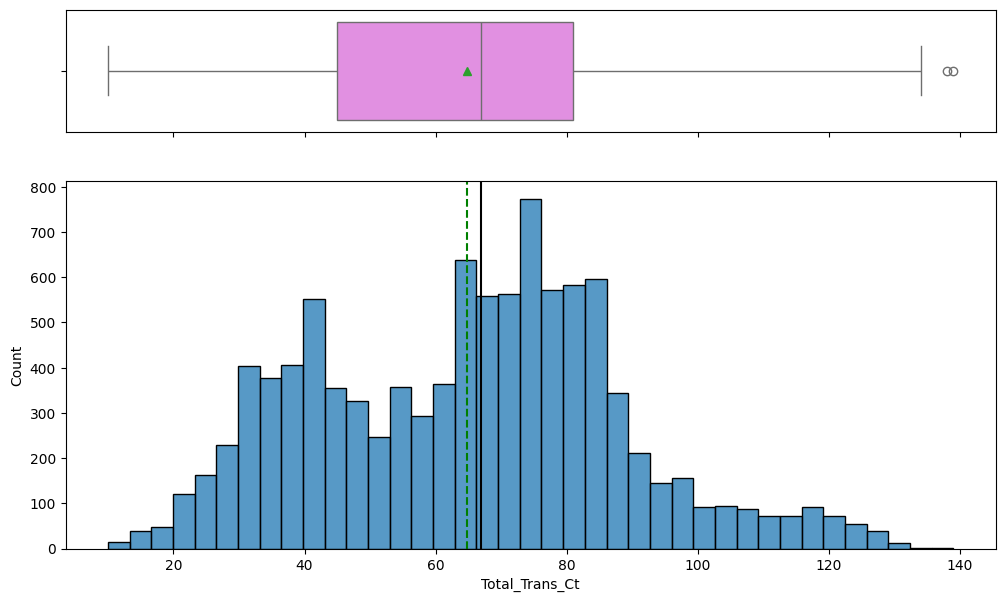

In [29]:
# Observations on Total_Trans_Ct
histogram_boxplot(df, "Total_Trans_Ct")

* There are some high outliers

`Total_Amt_Chng_Q4_Q1`

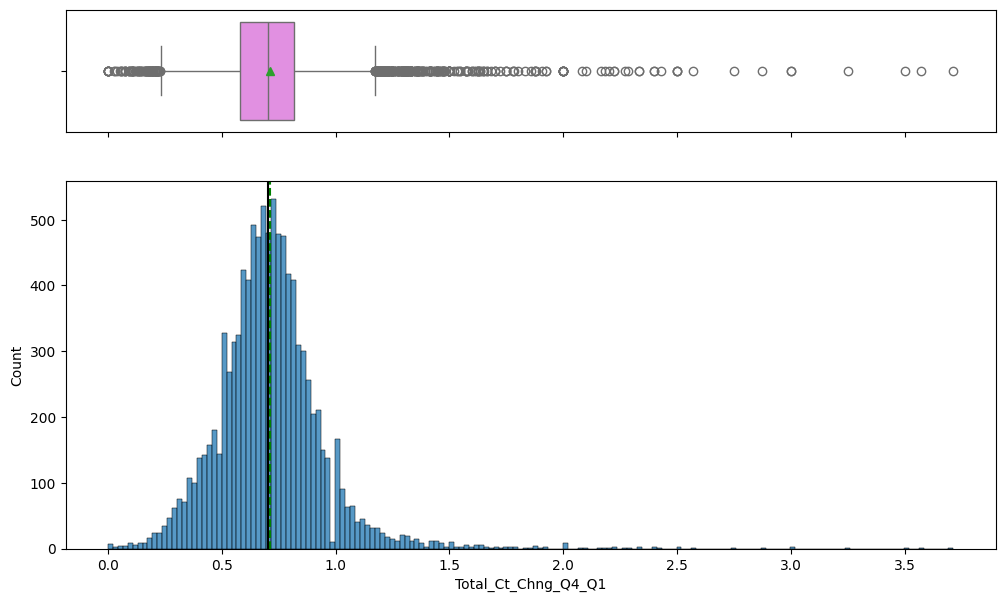

In [30]:
# Observations on Total_Ct_Chng_Q4_Q1
histogram_boxplot(df, "Total_Ct_Chng_Q4_Q1")

* There are lots of outliers in both side

`Total_Trans_Amt`

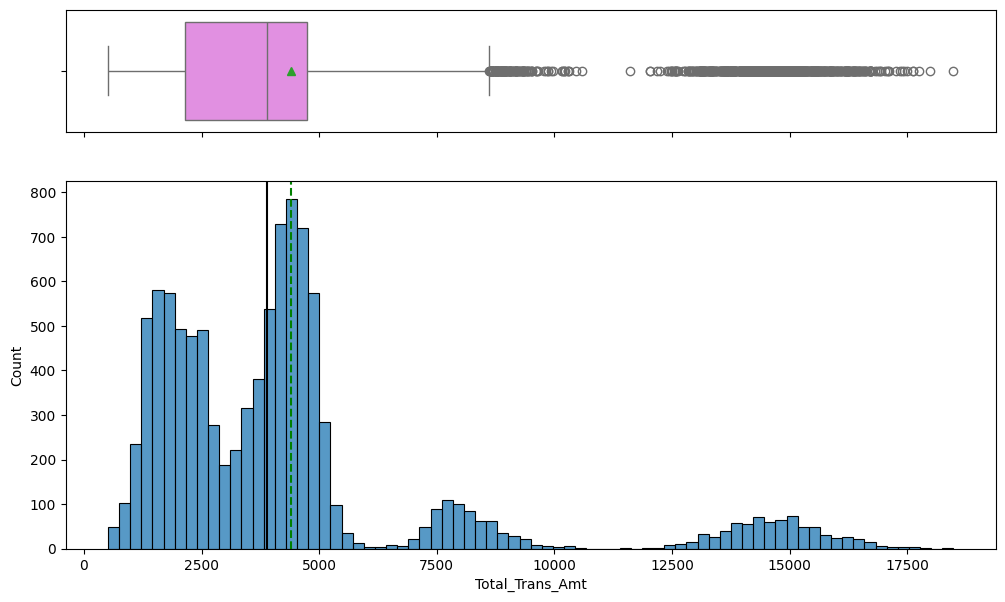

In [31]:
# Observations on Total_Trans_Amt
histogram_boxplot(df, 'Total_Trans_Amt')

* There are lots of high outliers

`Total_Ct_Chng_Q4_Q1`

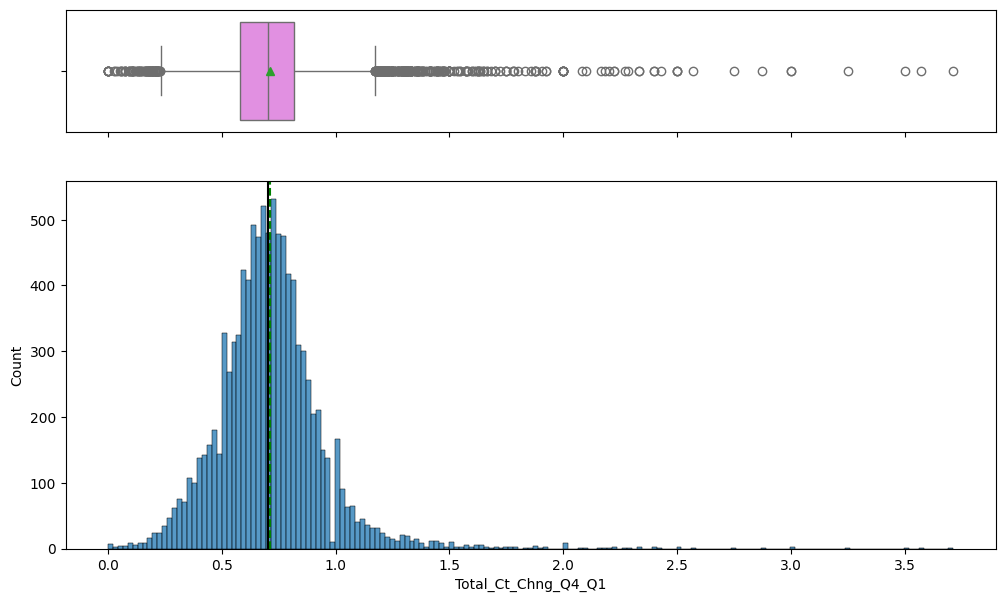

In [32]:
# Observations on Total_Ct_Chng_Q4_Q1
histogram_boxplot(df, 'Total_Ct_Chng_Q4_Q1')

* There are many high and low outliers

`Avg_Utilization_Ratio`

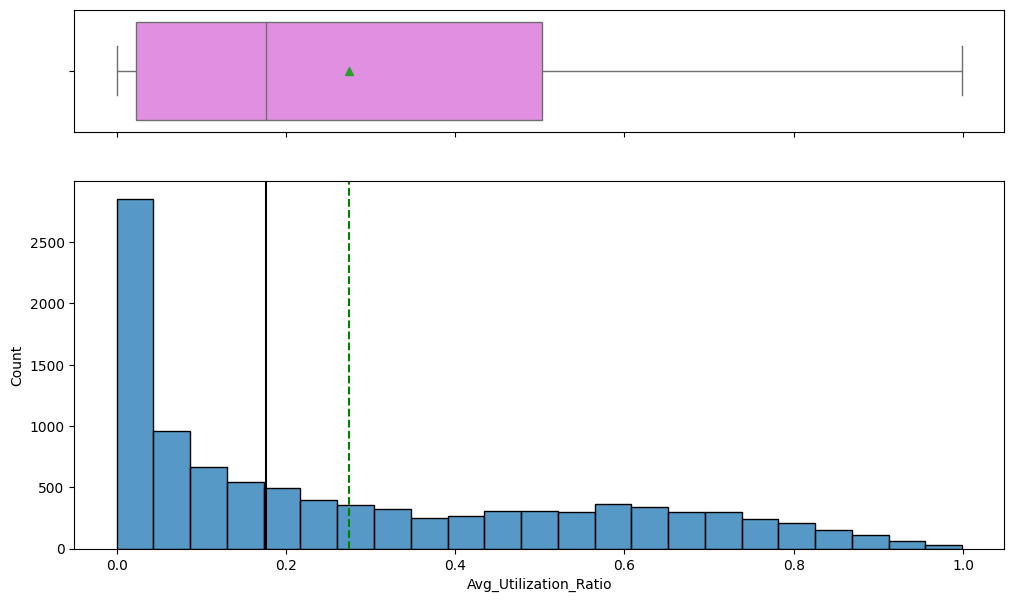

In [33]:
# Observation on Avg_Utilization_Ratio
histogram_boxplot(df, 'Avg_Utilization_Ratio')

* The distribution is right skewd.
* There are no outliers

`Dependent_count`

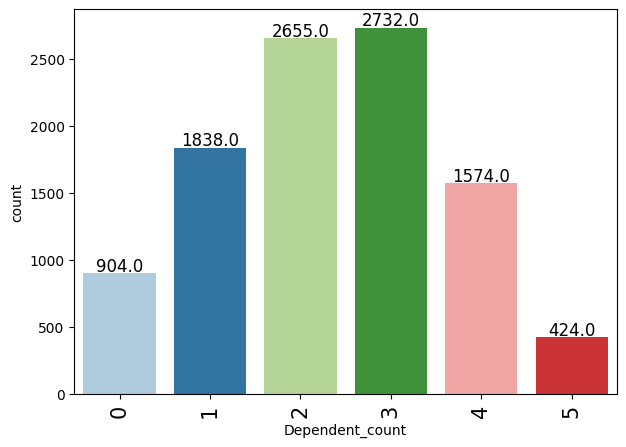

In [34]:
# Observation on Dependent_count
labeled_barplot(df, "Dependent_count")

In [35]:
# Getting percentages of values
df['Dependent_count'].value_counts(1)

3   0.270
2   0.262
1   0.181
4   0.155
0   0.089
5   0.042
Name: Dependent_count, dtype: float64

* 26.9% of customers have 3 dependents.
* 26.2% of customers have 2 dependents.
* 18% of customers have 1 dependent.
* 15% of customers have 4 dependents.

`Total_Relationship_Count`



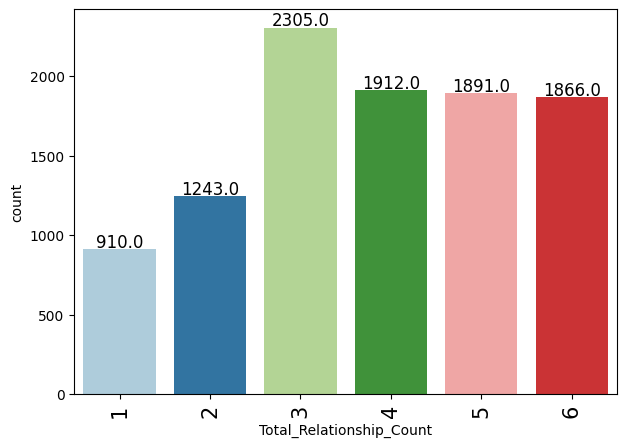

In [36]:
# Observation on Total_Relationship_Count
labeled_barplot(df, "Total_Relationship_Count")

In [37]:
# Getting percentages of values
df['Total_Relationship_Count'].value_counts(1)

3   0.228
4   0.189
5   0.187
6   0.184
2   0.123
1   0.090
Name: Total_Relationship_Count, dtype: float64

`Months_Inactive_12_mon`

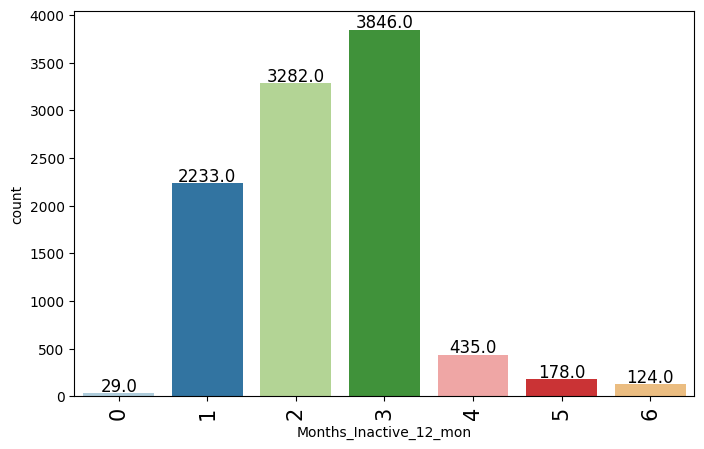

In [38]:
#  Observations on `Months_Inactive_12_mon
labeled_barplot(df, "Months_Inactive_12_mon")

In [39]:
# Getting percentages of values
df['Months_Inactive_12_mon'].value_counts(1)

3   0.380
2   0.324
1   0.220
4   0.043
5   0.018
6   0.012
0   0.003
Name: Months_Inactive_12_mon, dtype: float64

* 38% of customers have 3 months inactive.
* 32% of customers have 2 months inactive.
* 22% of customers have 1 months inactive.

`Contacts_Count_12_mon`

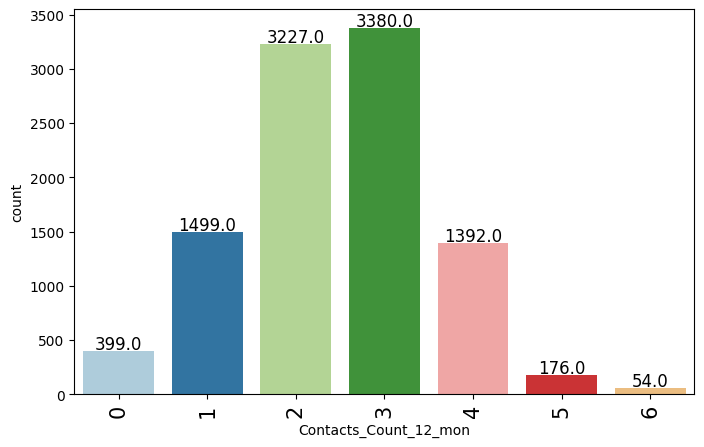

In [40]:
#  Observations on Contacts_Count_12_mon
labeled_barplot(df, "Contacts_Count_12_mon")

In [41]:
# Getting percentages of values
df['Contacts_Count_12_mon'].value_counts(1)

3   0.334
2   0.319
1   0.148
4   0.137
0   0.039
5   0.017
6   0.005
Name: Contacts_Count_12_mon, dtype: float64

* 33% of customers have been contacted 3 times in the last 12 months.
* 31% of customers have been contacted 2 times in the last 12 months.
* 14% of customers have been contacted 1 times in the last 12 months.
* 13% of customers have been contacted 4 times in the last 12 months.

`Gender`

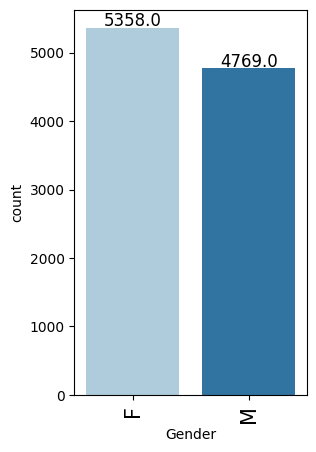

In [42]:
#  Observations on Gender
labeled_barplot(df, "Gender")

In [43]:
# Getting percentages of values
df['Gender'].value_counts(normalize=True)

F   0.529
M   0.471
Name: Gender, dtype: float64

* 52.9% of customers are female.
* 47.1% of customers are male.

`Education_Level`

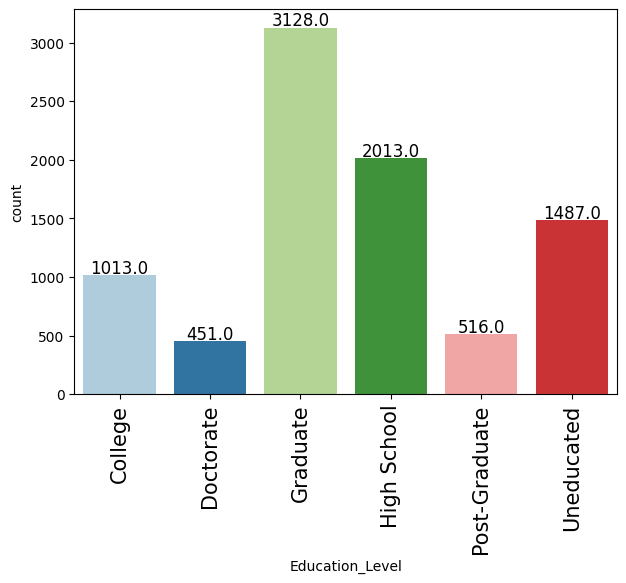

In [44]:
#  Observations on Education_Level
labeled_barplot(df, "Education_Level")

In [45]:
# Getting percentages of values
df['Education_Level'].value_counts(normalize=True)

Graduate        0.363
High School     0.234
Uneducated      0.173
College         0.118
Post-Graduate   0.060
Doctorate       0.052
Name: Education_Level, dtype: float64

* 36% of customers have a graduate degree.
* 23% of customers have a high school diploma.
* 17% of customers are uneducated.
* 11% of customers have college degree.

`Marital_Status`

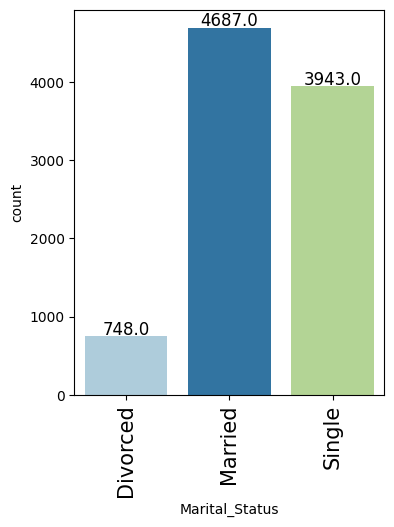

In [46]:
# Observations on Marital_Status
labeled_barplot(df, "Marital_Status")

In [47]:
# Getting percentages of values
df.value_counts('Marital_Status', normalize=True)

Marital_Status
Married    0.500
Single     0.420
Divorced   0.080
dtype: float64

* 50% of customers are married.
* 42% of customers are single.
* 8% of customers are divorced.

`Income_Category`

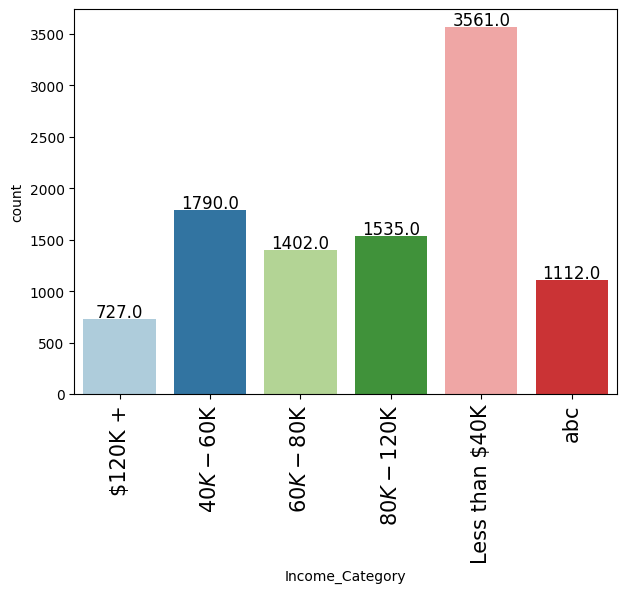

In [48]:
# Obsesrvations on Income_Category
labeled_barplot(df, "Income_Category")

In [49]:
# Getting percentages of values
df['Income_Category'].value_counts(normalize=True)

Less than $40K   0.352
$40K - $60K      0.177
$80K - $120K     0.152
$60K - $80K      0.138
abc              0.110
$120K +          0.072
Name: Income_Category, dtype: float64

* 35% of customers make less than 40k.
* 17% of customers make between 40k - 60k.
* 15% of customers make between 80k - 120k.
* 13% of customers make between 60k - 80k.
* 11% of customers have a wrong category which we will treat them later


`Card_Category`

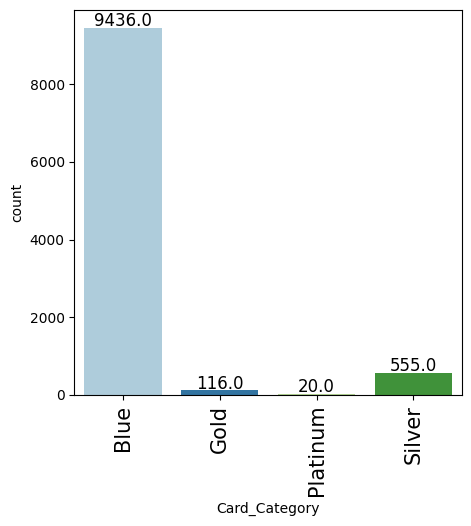

In [50]:
# Observations on Card_Category
labeled_barplot(df, "Card_Category")

In [51]:
# Getting percentage of values
df['Card_Category'].value_counts(normalize=True)

Blue       0.932
Silver     0.055
Gold       0.011
Platinum   0.002
Name: Card_Category, dtype: float64

* 93% of customers has Blue card

`Attrition_Flag`

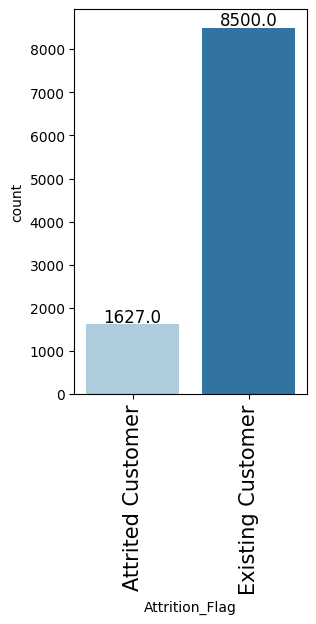

In [52]:
# Observations on `Attrition_Flag`
labeled_barplot(df, "Attrition_Flag")

In [53]:
# Getting percentages of the values
df['Attrition_Flag'].value_counts(normalize=True)

Existing Customer   0.839
Attrited Customer   0.161
Name: Attrition_Flag, dtype: float64

* 83.9% of all customers are existing customers.



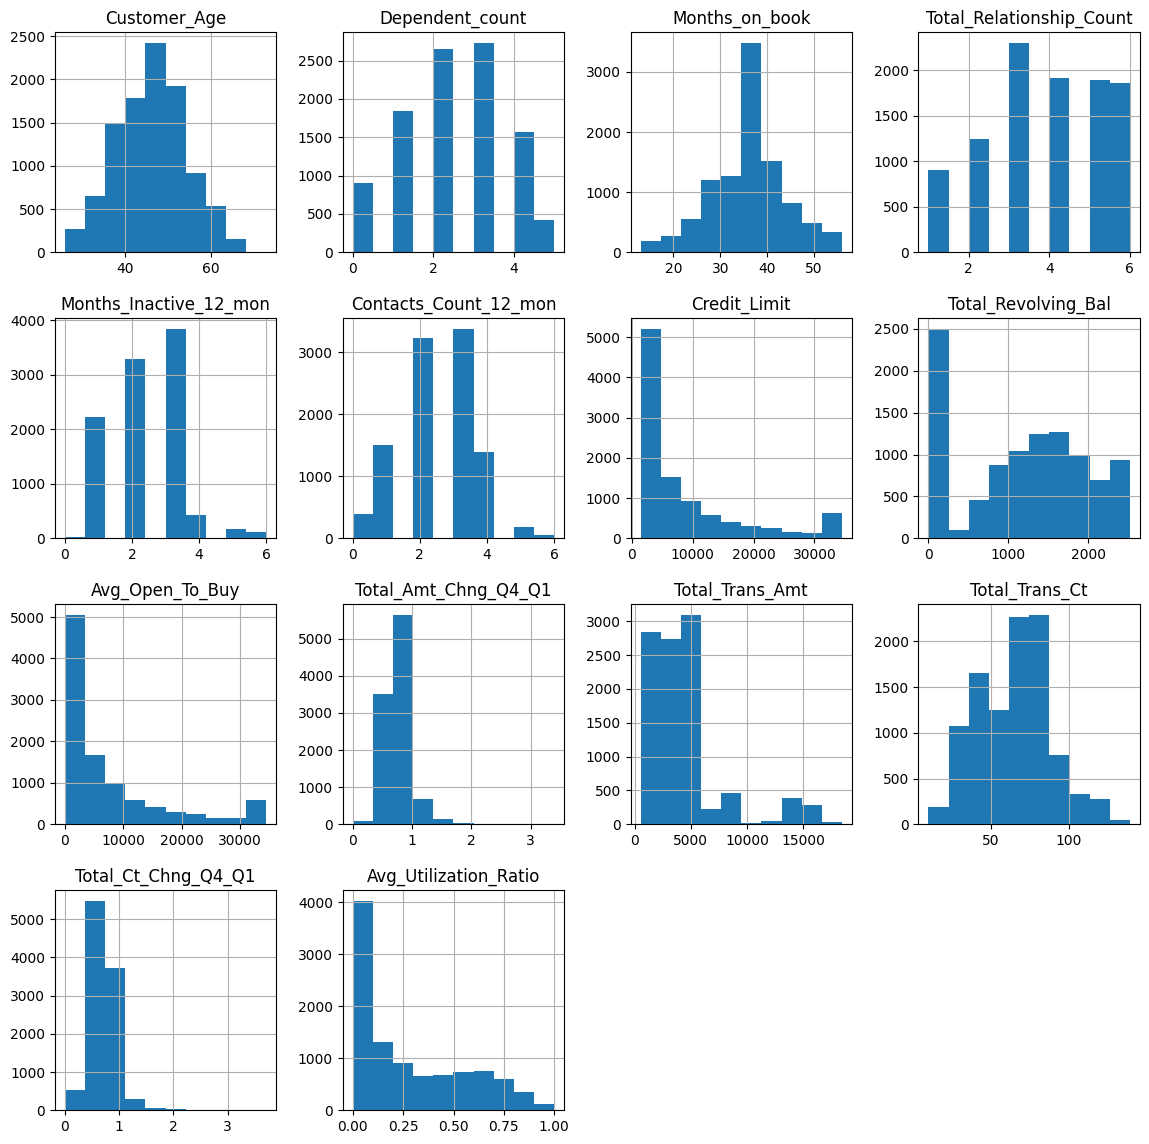

In [54]:
# creating histograms
df.hist(figsize=(14, 14))
plt.show()

### Bivariate Distributions

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  object 
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  object 
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           8608 non-null   object 
 5   Marital_Status            9378 non-null   object 
 6   Income_Category           10127 non-null  object 
 7   Card_Category             10127 non-null  object 
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  
 14  Avg_Op

**Correlation Check**

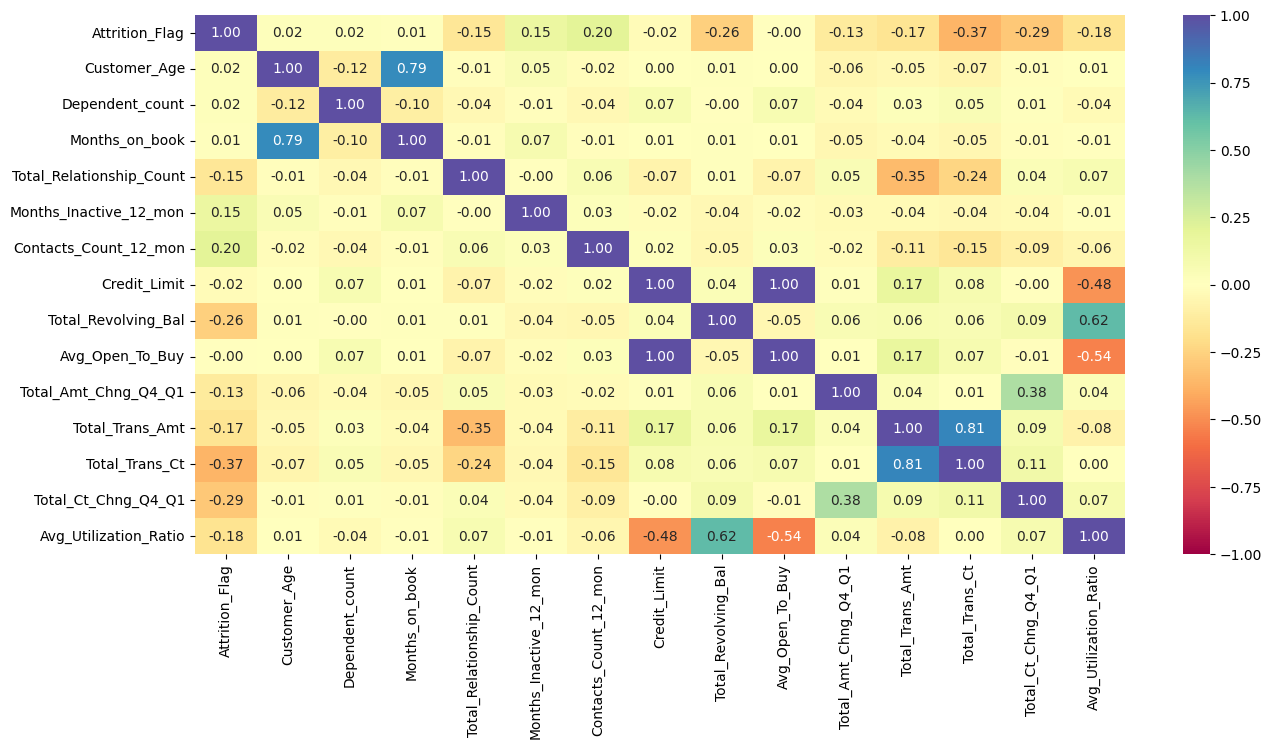

In [56]:
plt.figure(figsize=(15, 7))
numeric_df = data.select_dtypes(include=['number']) # Select only numeric columns
sns.heatmap(numeric_df.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

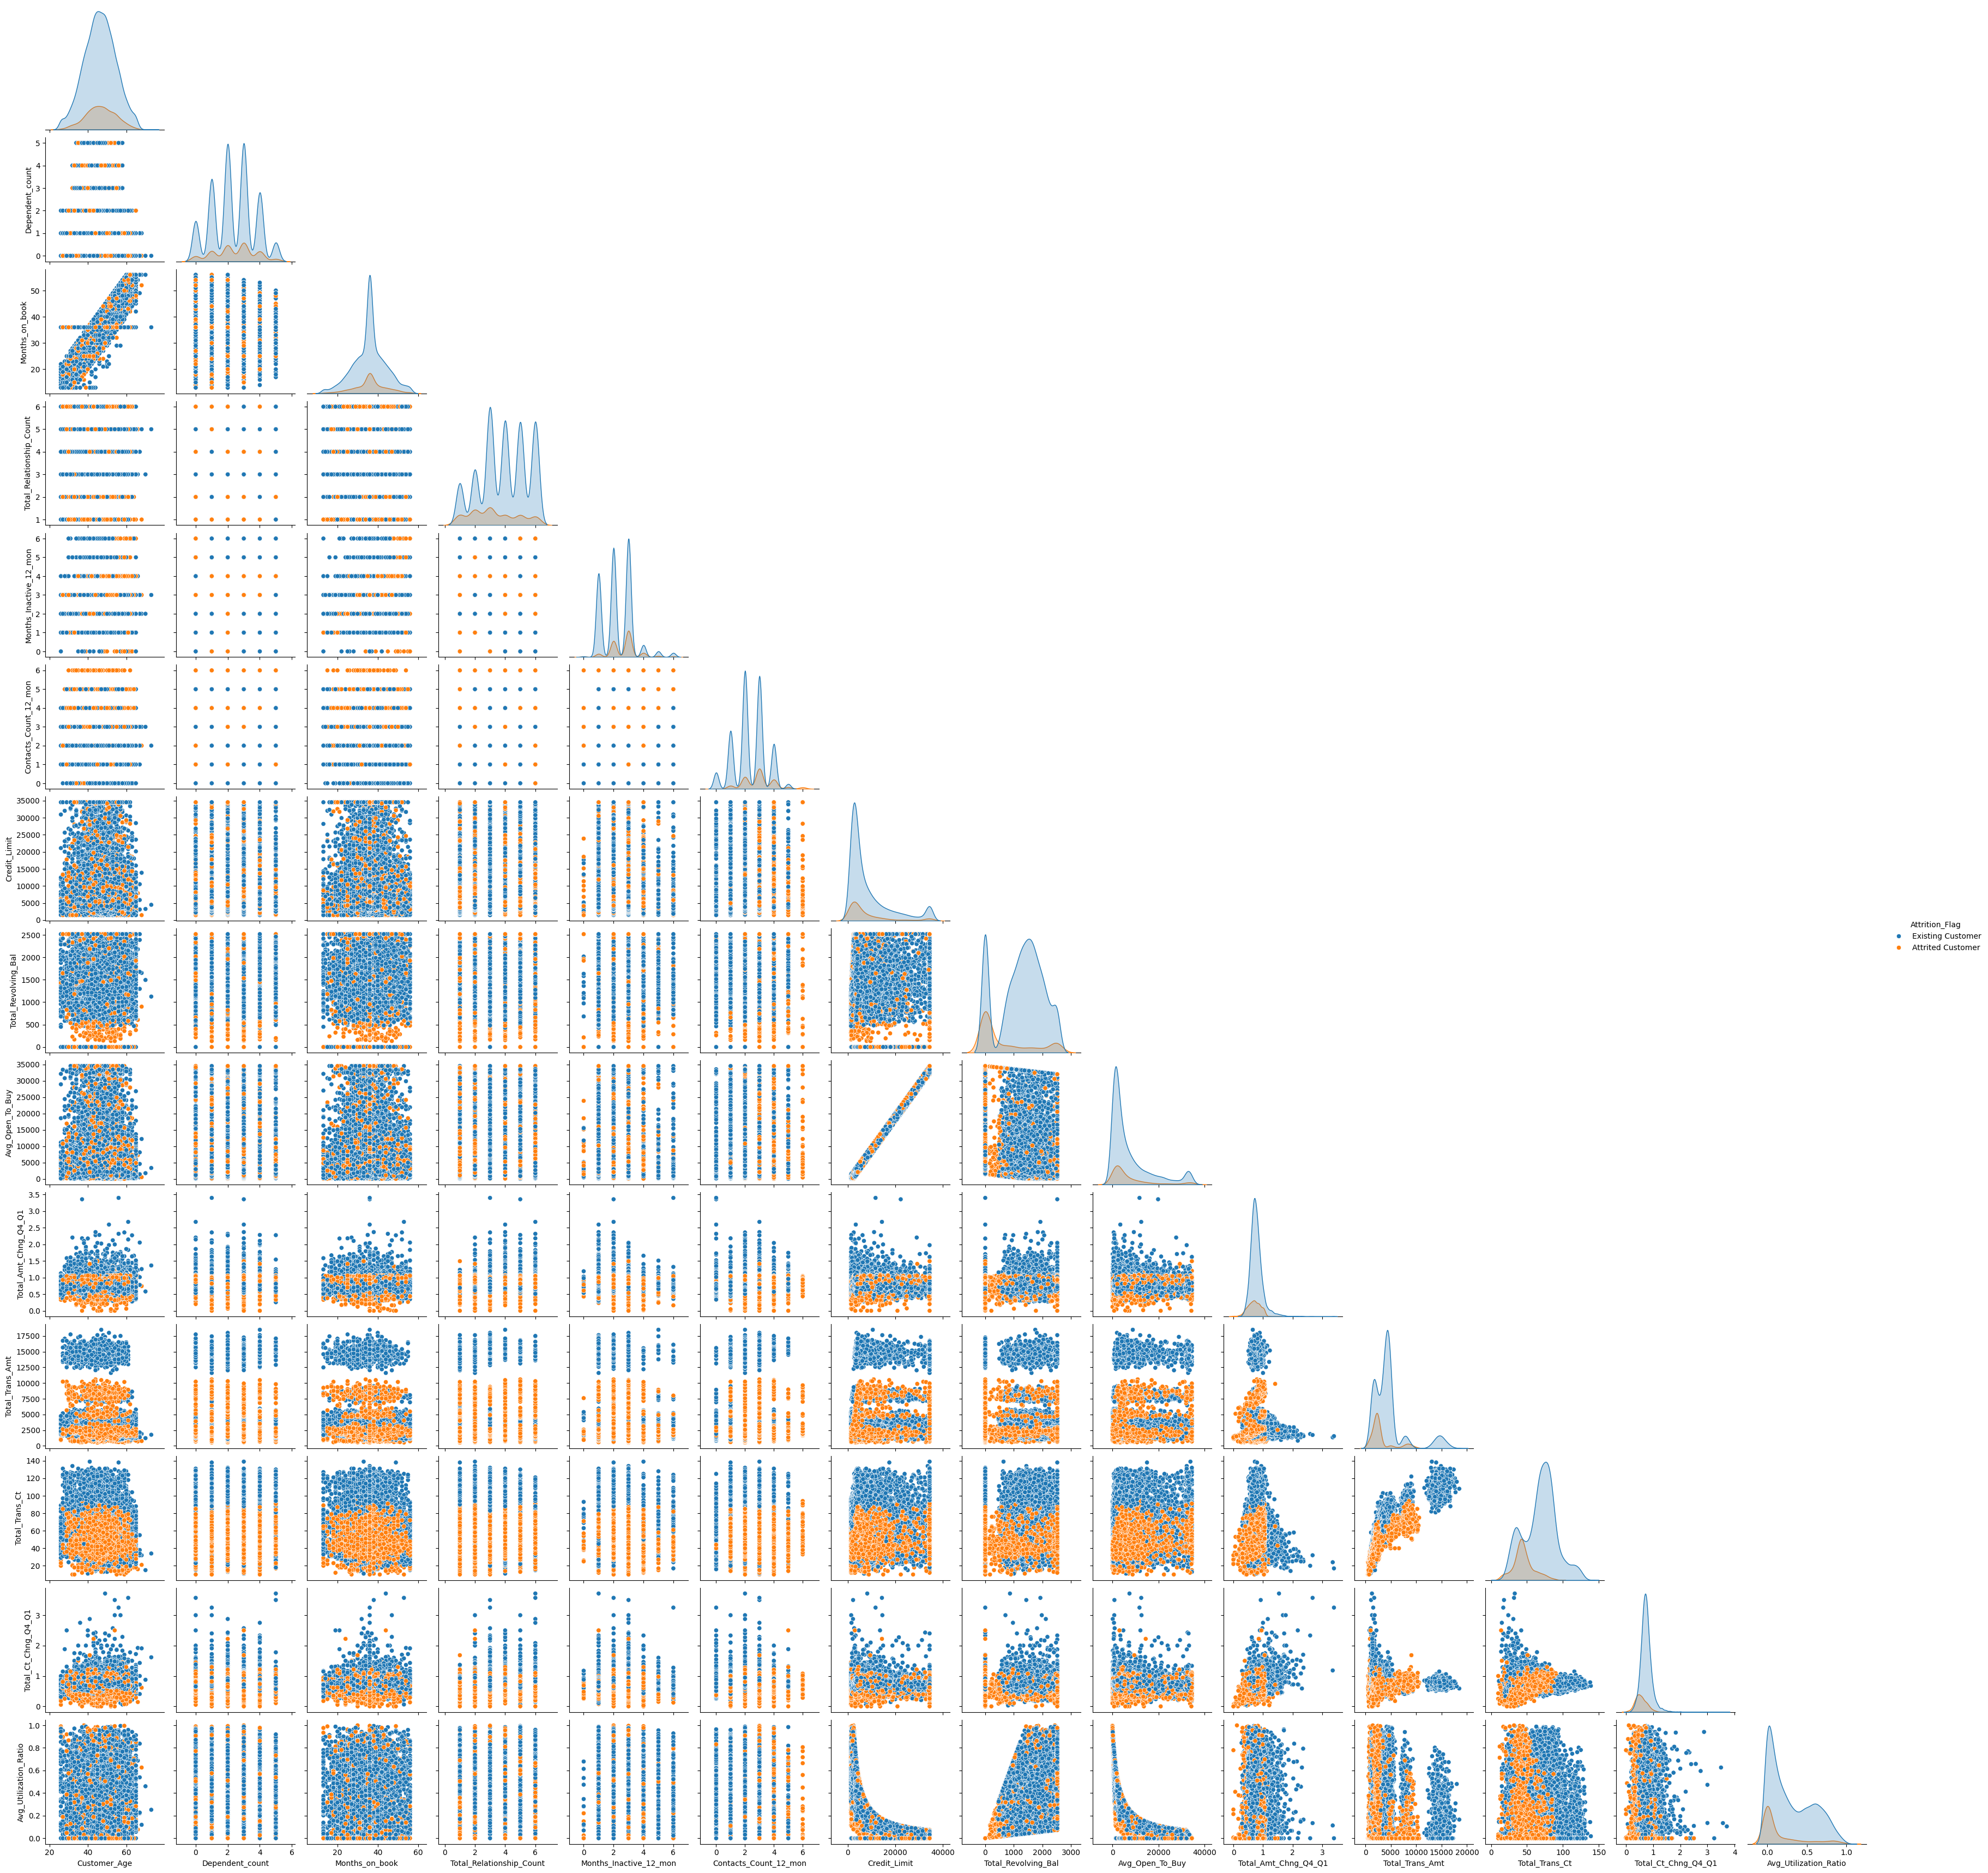

In [57]:
sns.pairplot(df, hue="Attrition_Flag", corner=True)

* `Avg_Open_to_Buy` and `Credit_Limit` are completely positively correlated by necessity.
* `Total_Trans_Amt` and `Total_Trans_Ct` are highly positively correlated.
* `Customer_Age` and `Months_on_book` are highly positively correlated.
* `Total_Revolving balance` and `Avg_Utilization_Ratio` is positively correlated.
* `Avg_Open_To_Buy` and `Avg_Utilization_Ratio` are negatively correlated.
* `Credit_Limit` and `Avg_Utilization_Ratio` are negatively correlated.


`Attrition_Flag vs Gender`

Attrition_Flag  Attrited Customer  Existing Customer    All
Gender                                                     
All                          1627               8500  10127
F                             930               4428   5358
M                             697               4072   4769
------------------------------------------------------------------------------------------------------------------------


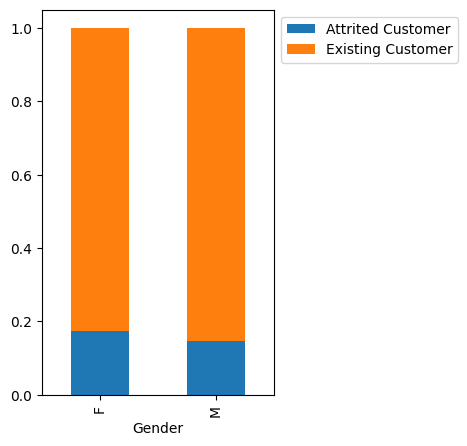

In [58]:
stacked_barplot(df, "Gender", "Attrition_Flag")

* Seems gender does not have affect on Attrition_Flag

`Attrition_Flag vs Marital_Status`

Attrition_Flag  Attrited Customer  Existing Customer   All
Marital_Status                                            
All                          1498               7880  9378
Married                       709               3978  4687
Single                        668               3275  3943
Divorced                      121                627   748
------------------------------------------------------------------------------------------------------------------------


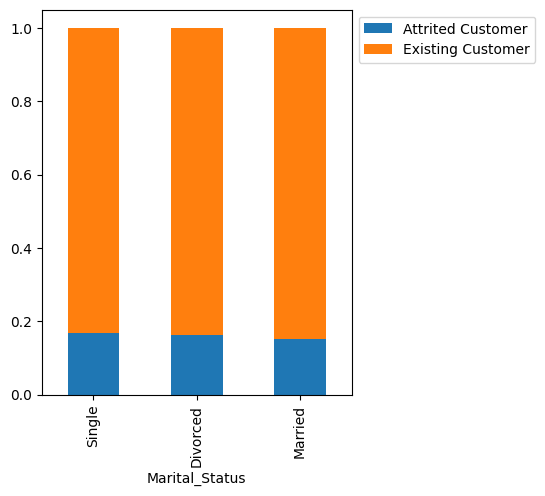

In [59]:
stacked_barplot(df, "Marital_Status", "Attrition_Flag")

* Seems Material_Status does not have affect on Attrition_Flag

`Attrition_Flag vs Education_Level`

Attrition_Flag   Attrited Customer  Existing Customer   All
Education_Level                                            
All                           1371               7237  8608
Graduate                       487               2641  3128
High School                    306               1707  2013
Uneducated                     237               1250  1487
College                        154                859  1013
Doctorate                       95                356   451
Post-Graduate                   92                424   516
------------------------------------------------------------------------------------------------------------------------


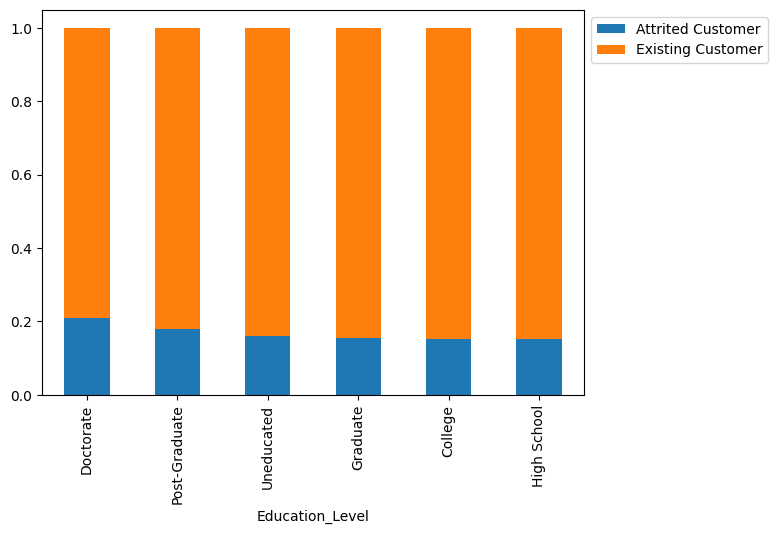

In [60]:
stacked_barplot(df, "Education_Level", "Attrition_Flag")

* Seems people with doctorate degree slitghtly more are Attrited Customer

`Attrition_Flag vs Income_Category`

Attrition_Flag   Attrited Customer  Existing Customer    All
Income_Category                                             
All                           1627               8500  10127
Less than $40K                 612               2949   3561
$40K - $60K                    271               1519   1790
$80K - $120K                   242               1293   1535
$60K - $80K                    189               1213   1402
abc                            187                925   1112
$120K +                        126                601    727
------------------------------------------------------------------------------------------------------------------------


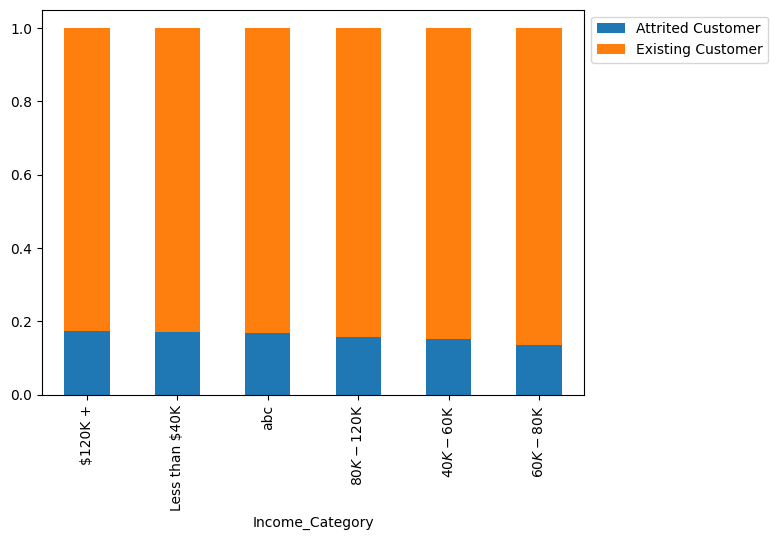

In [61]:
stacked_barplot(df, "Income_Category", "Attrition_Flag")

* Income_Category does not appear to significantly affect attrition. abc category will be treated later.


`Attrition_Flag vs Contacts_Count_12_mon`

Attrition_Flag         Attrited Customer  Existing Customer    All
Contacts_Count_12_mon                                             
All                                 1627               8500  10127
3                                    681               2699   3380
2                                    403               2824   3227
4                                    315               1077   1392
1                                    108               1391   1499
5                                     59                117    176
6                                     54                  0     54
0                                      7                392    399
------------------------------------------------------------------------------------------------------------------------


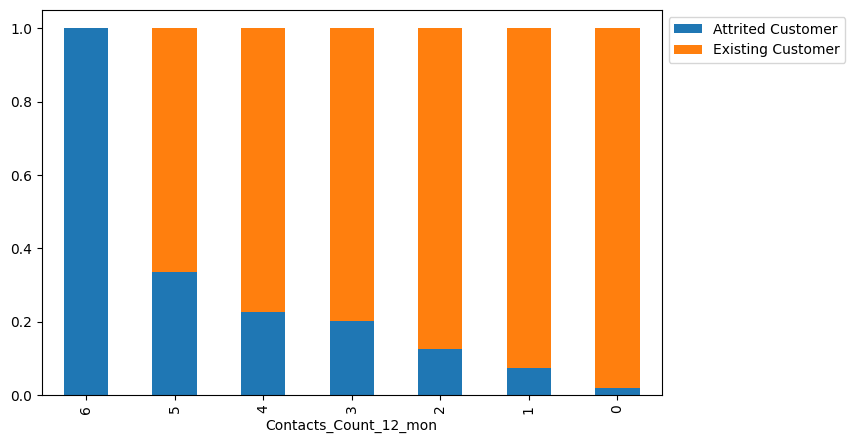

In [62]:
stacked_barplot(df, "Contacts_Count_12_mon", "Attrition_Flag")

* All of customers with 6 contacts has closed their account,
* More contacts more likely closing their account

`Attrition_Flag vs Months_Inactive_12_mon`

Attrition_Flag          Attrited Customer  Existing Customer    All
Months_Inactive_12_mon                                             
All                                  1627               8500  10127
3                                     826               3020   3846
2                                     505               2777   3282
4                                     130                305    435
1                                     100               2133   2233
5                                      32                146    178
6                                      19                105    124
0                                      15                 14     29
------------------------------------------------------------------------------------------------------------------------


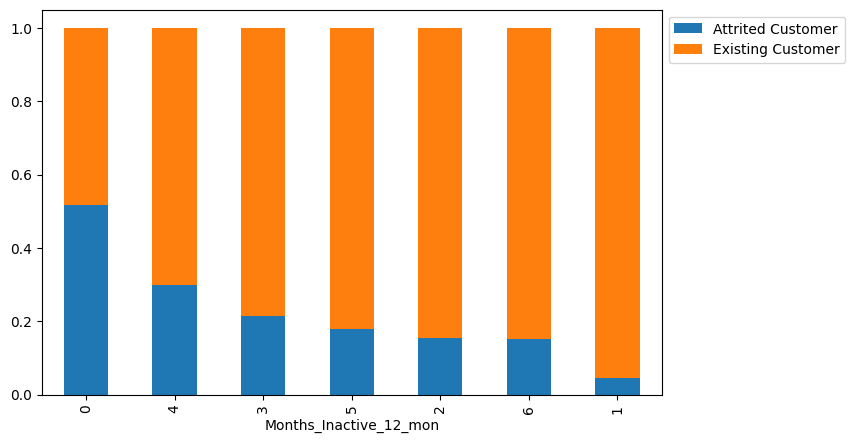

In [63]:
stacked_barplot(df, "Months_Inactive_12_mon", "Attrition_Flag")

* 0 inactive months has the highest ratio on closing accounts

`Attrition_Flag vs Total_Relationship_Count`

Attrition_Flag            Attrited Customer  Existing Customer    All
Total_Relationship_Count                                             
All                                    1627               8500  10127
3                                       400               1905   2305
2                                       346                897   1243
1                                       233                677    910
5                                       227               1664   1891
4                                       225               1687   1912
6                                       196               1670   1866
------------------------------------------------------------------------------------------------------------------------


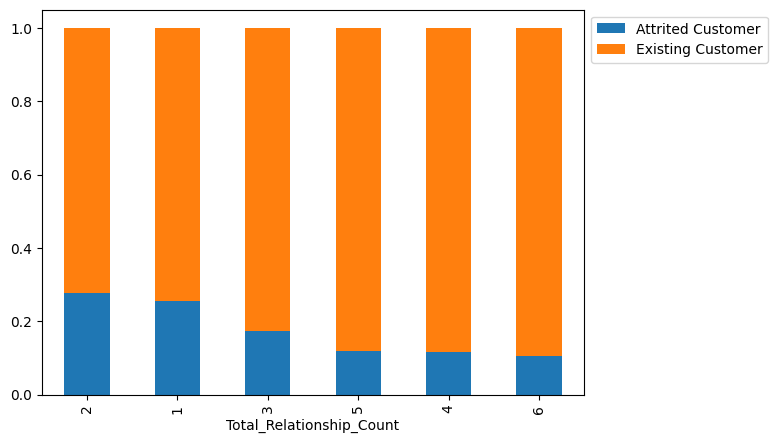

In [64]:
stacked_barplot(df, "Total_Relationship_Count", "Attrition_Flag")

* 6 count has the highest ratio of the existing account followed by 4

`Attrition_Flag vs Dependent_count`

Attrition_Flag   Attrited Customer  Existing Customer    All
Dependent_count                                             
All                           1627               8500  10127
3                              482               2250   2732
2                              417               2238   2655
1                              269               1569   1838
4                              260               1314   1574
0                              135                769    904
5                               64                360    424
------------------------------------------------------------------------------------------------------------------------


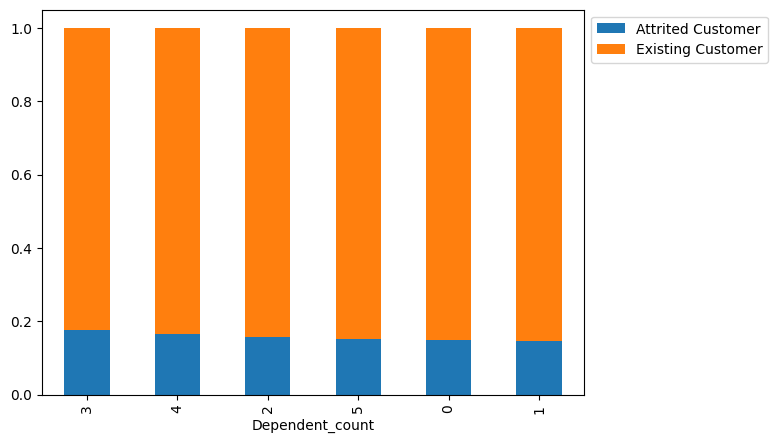

In [65]:
stacked_barplot(df, "Dependent_count", "Attrition_Flag")

* Seems dependent count ration is the same in all bins

`Total_Revolving_Bal` vs `Attrition_Flag`

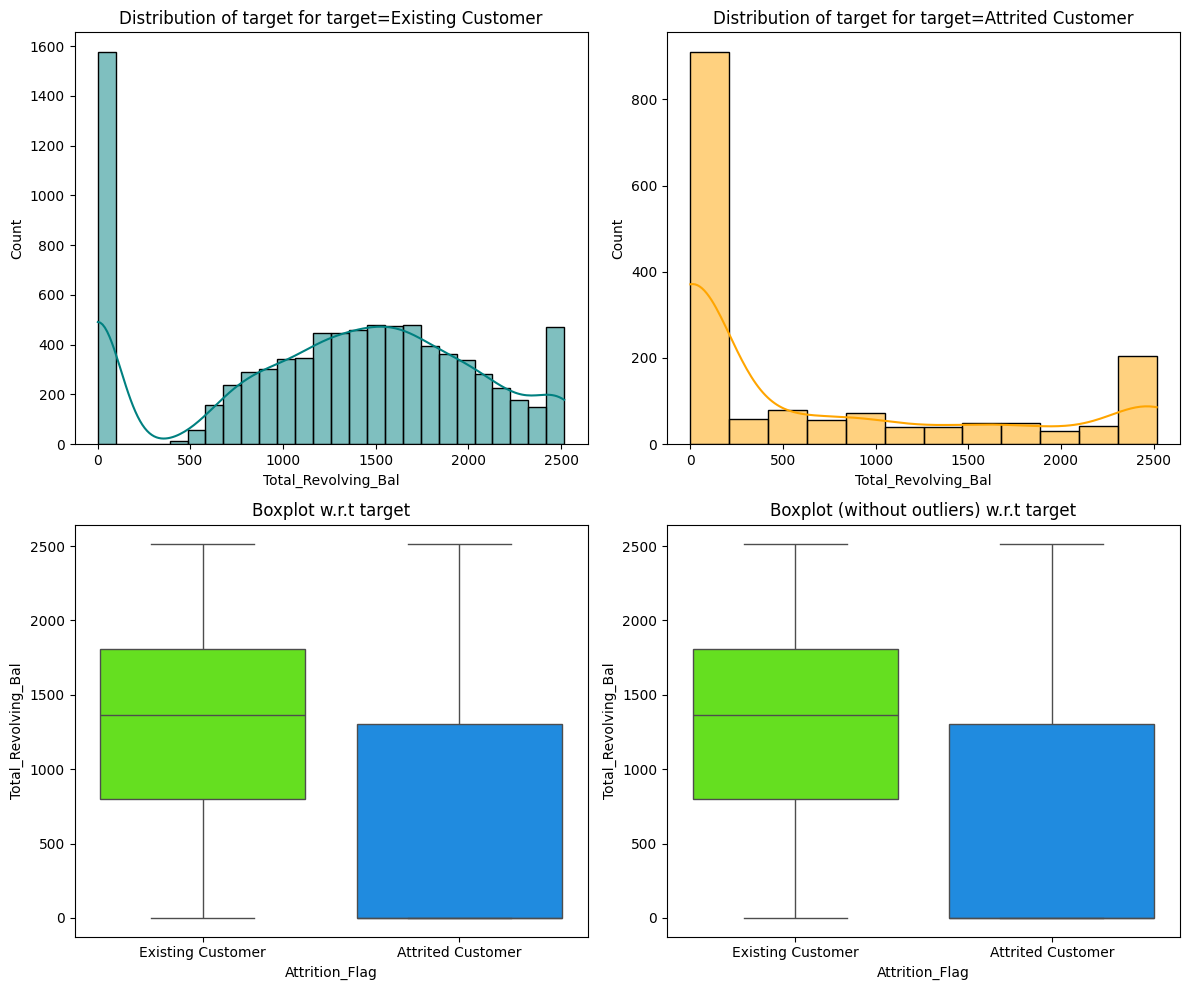

In [66]:
distribution_plot_wrt_target(df, "Total_Revolving_Bal", "Attrition_Flag")

* Existing customers has the highest total revolvin balance median

`Attrition_Flag vs Credit_Limit`

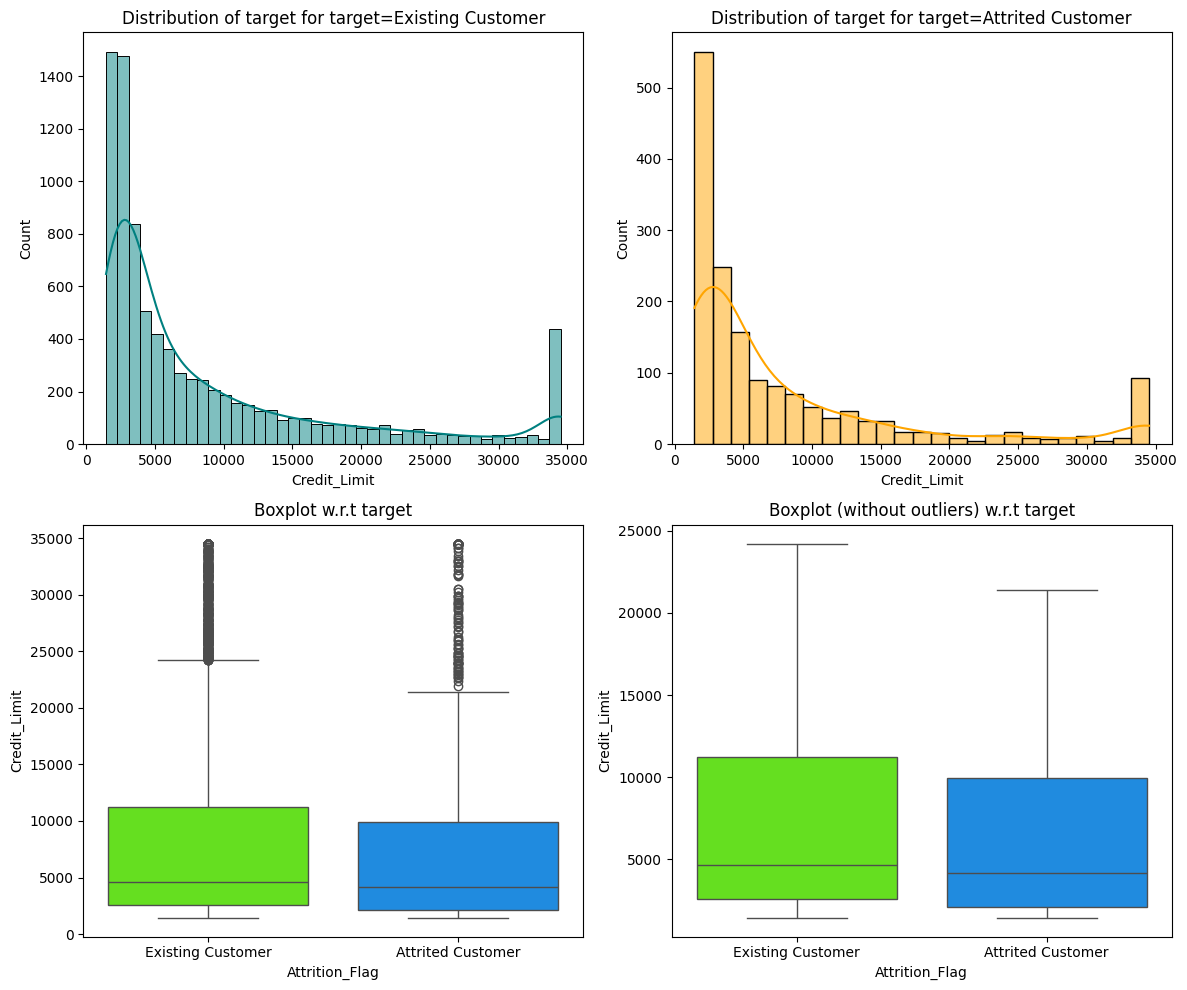

In [67]:
distribution_plot_wrt_target(df, "Credit_Limit", "Attrition_Flag")

* There are some high outliers in credit limit

`Attrition_Flag vs Customer_Age`

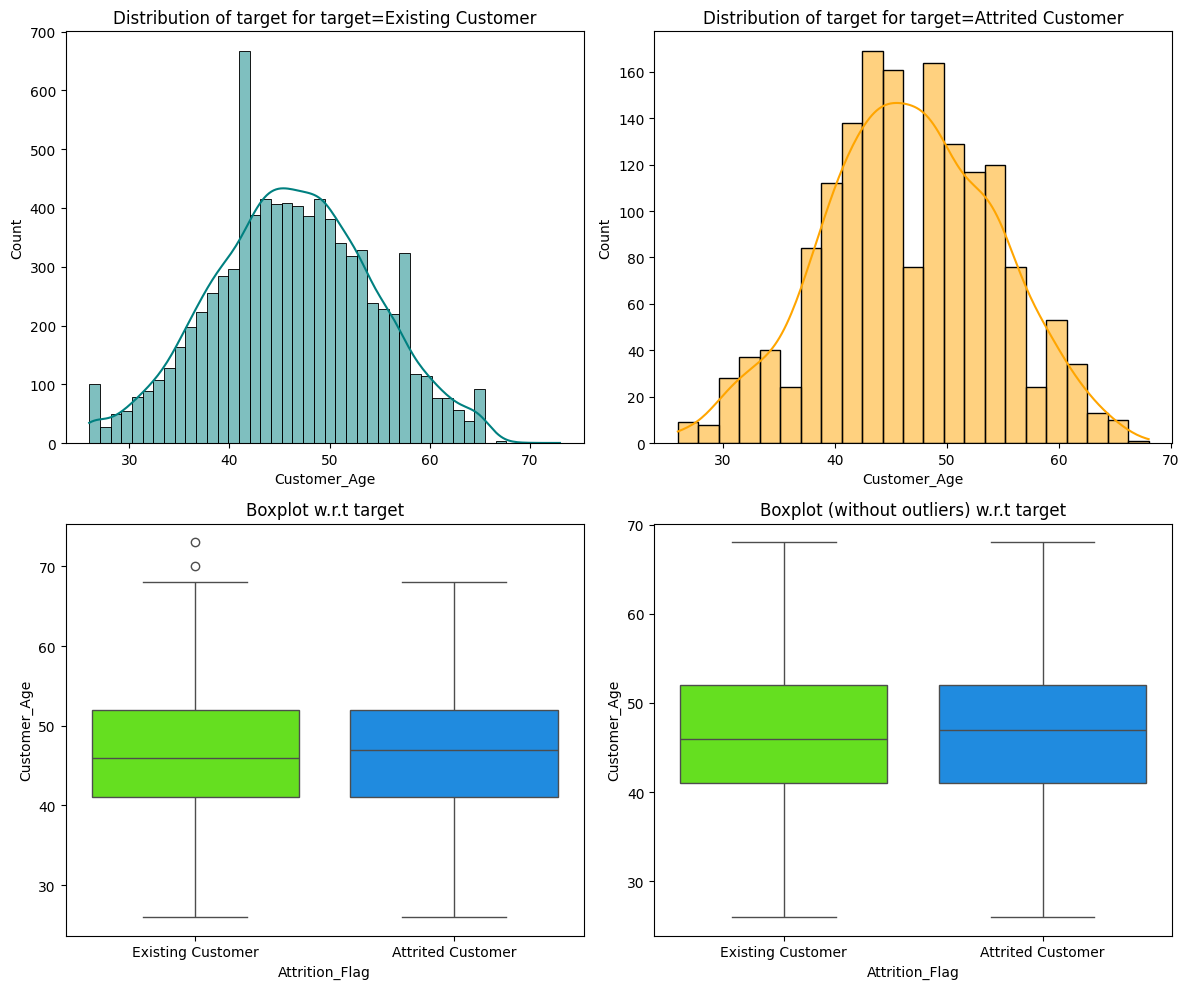

In [68]:
distribution_plot_wrt_target(df, "Customer_Age", "Attrition_Flag")

* Cusomers age has almost the same median

`Total_Trans_Ct` vs `Attrition_Flag`

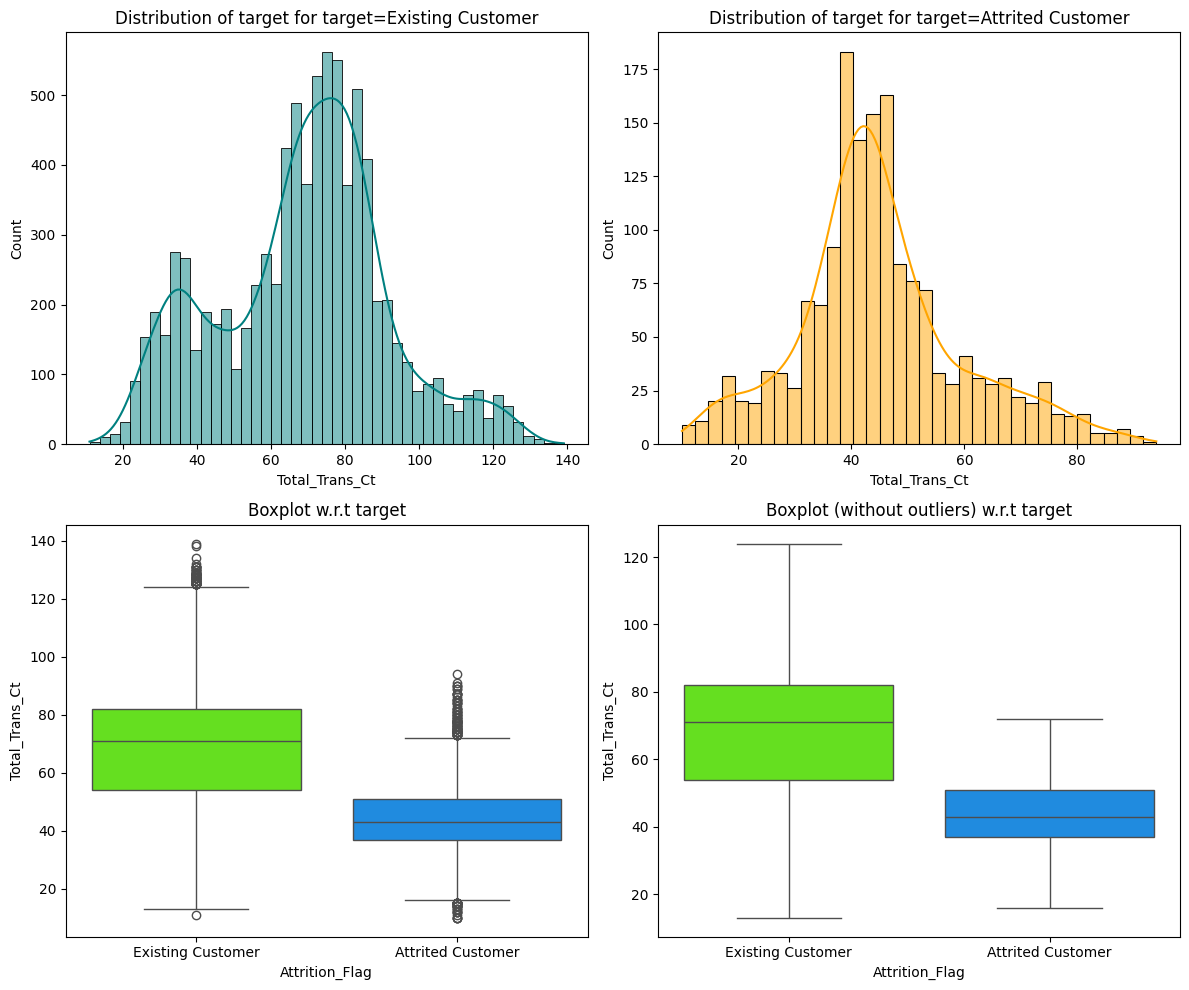

In [69]:
distribution_plot_wrt_target(df, "Total_Trans_Ct", "Attrition_Flag")

* The median of the total_trans_ct for existing customers is higher than the attrited ones.
* There are some high and low outliers

`Total_Trans_Amt` vs `Attrition_Flag`

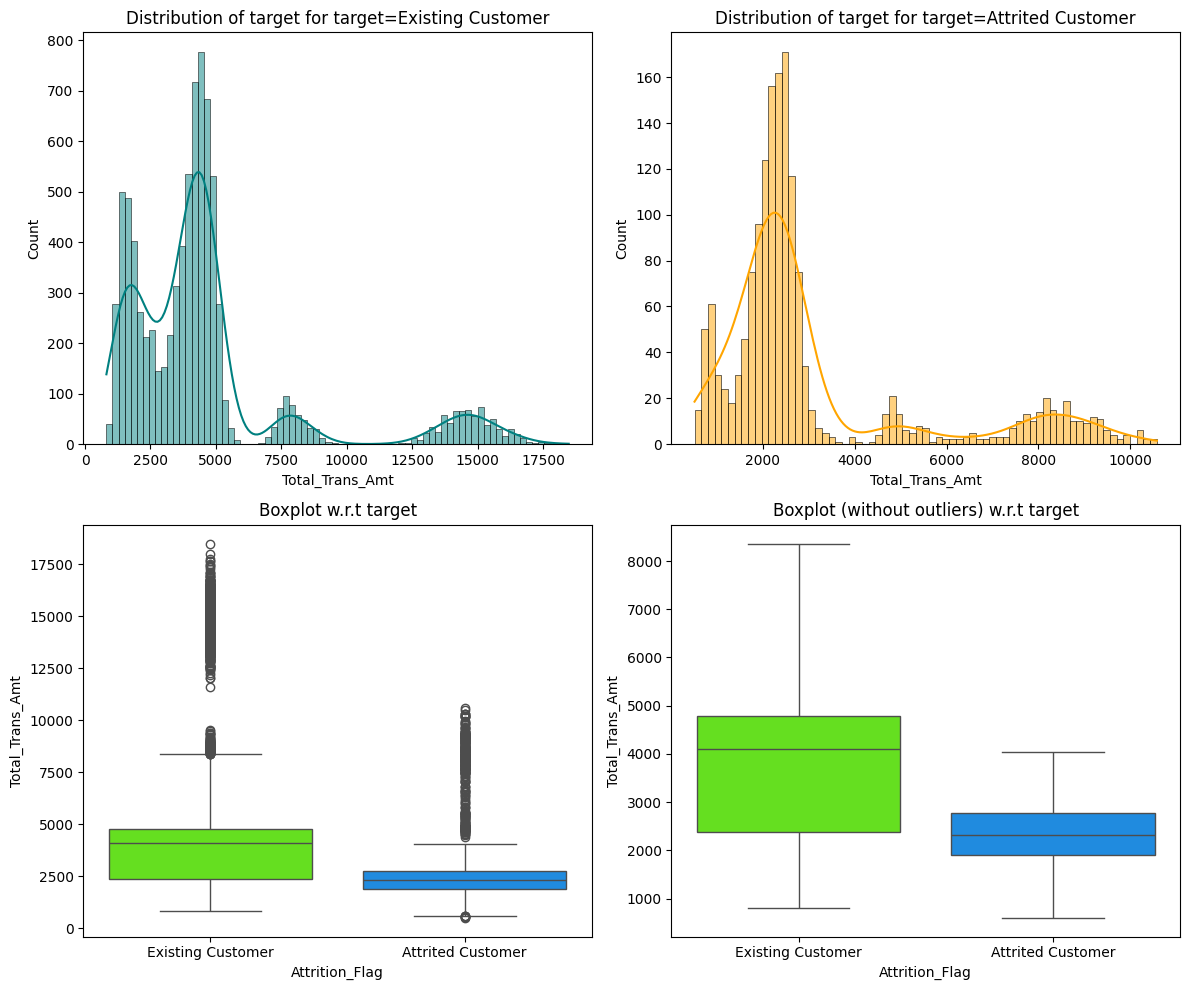

In [70]:
distribution_plot_wrt_target(df, "Total_Trans_Amt", "Attrition_Flag")

* Existing customers has a higher median on total transaction amount
* There are some high and low outliers

`Total_Ct_Chng_Q4_Q1` vs `Attrition_Flag`

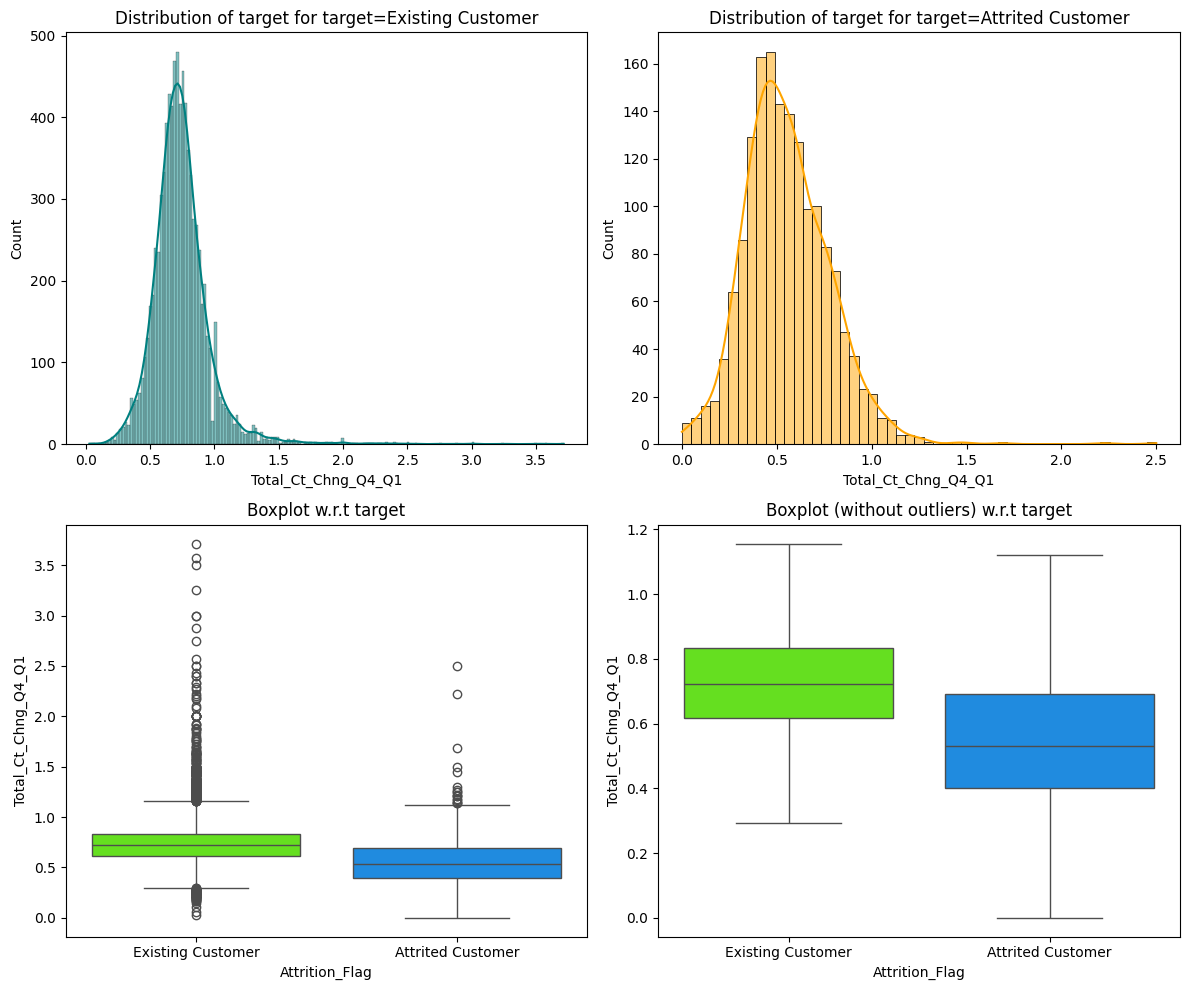

In [71]:
distribution_plot_wrt_target(df, "Total_Ct_Chng_Q4_Q1", "Attrition_Flag")

* Existing customers has a higher median in totla_ct_chng_q4_q1
* Tehre are some outliers

`Avg_Utilization_Ratio` vs `Attrition_Flag`

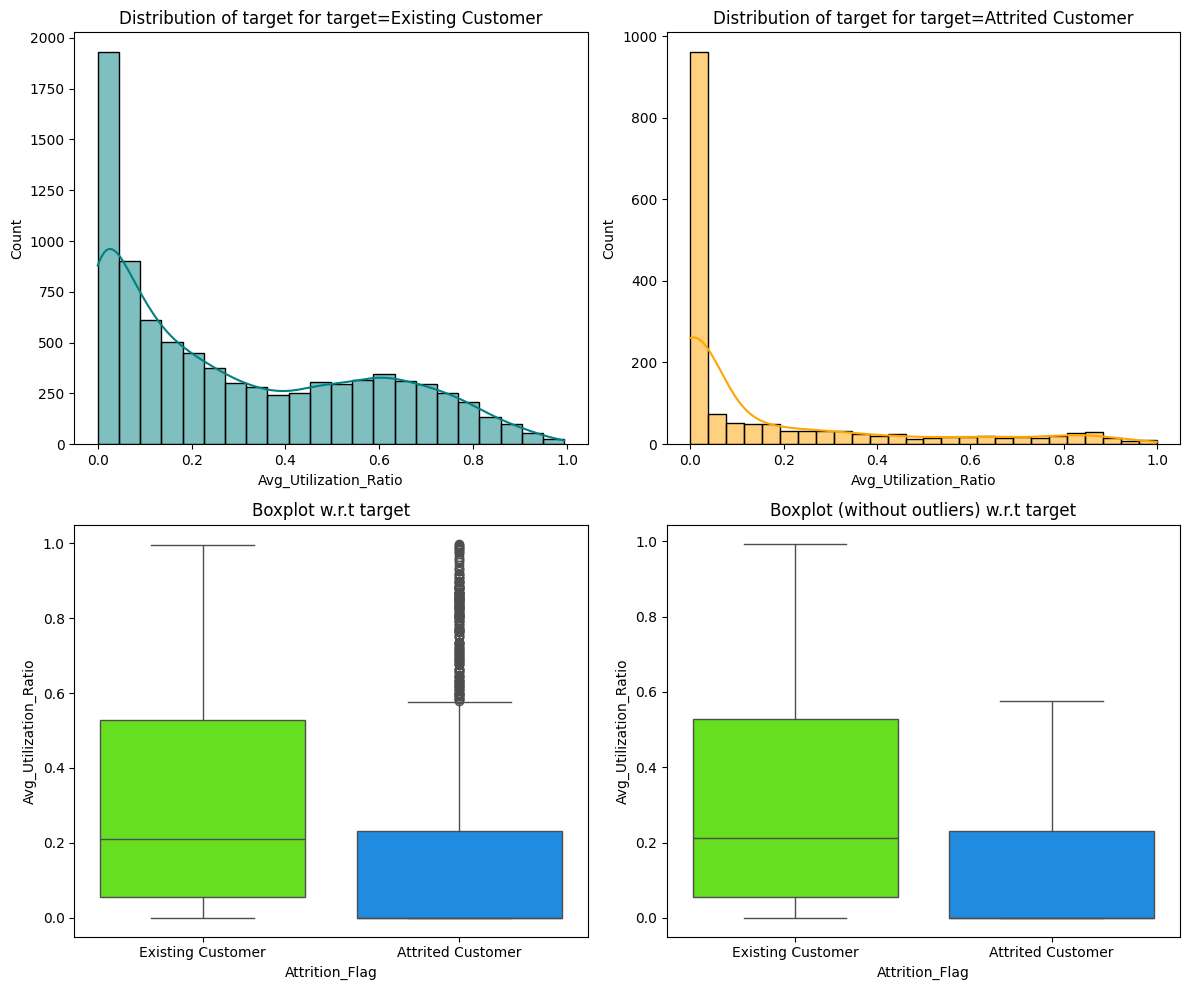

In [72]:
distribution_plot_wrt_target(df, "Avg_Utilization_Ratio", "Attrition_Flag")

* Existing customers has a higher median on Avg_Utilization_Ration
* There are some high outlers


`Attrition_Flag vs Months_on_book`

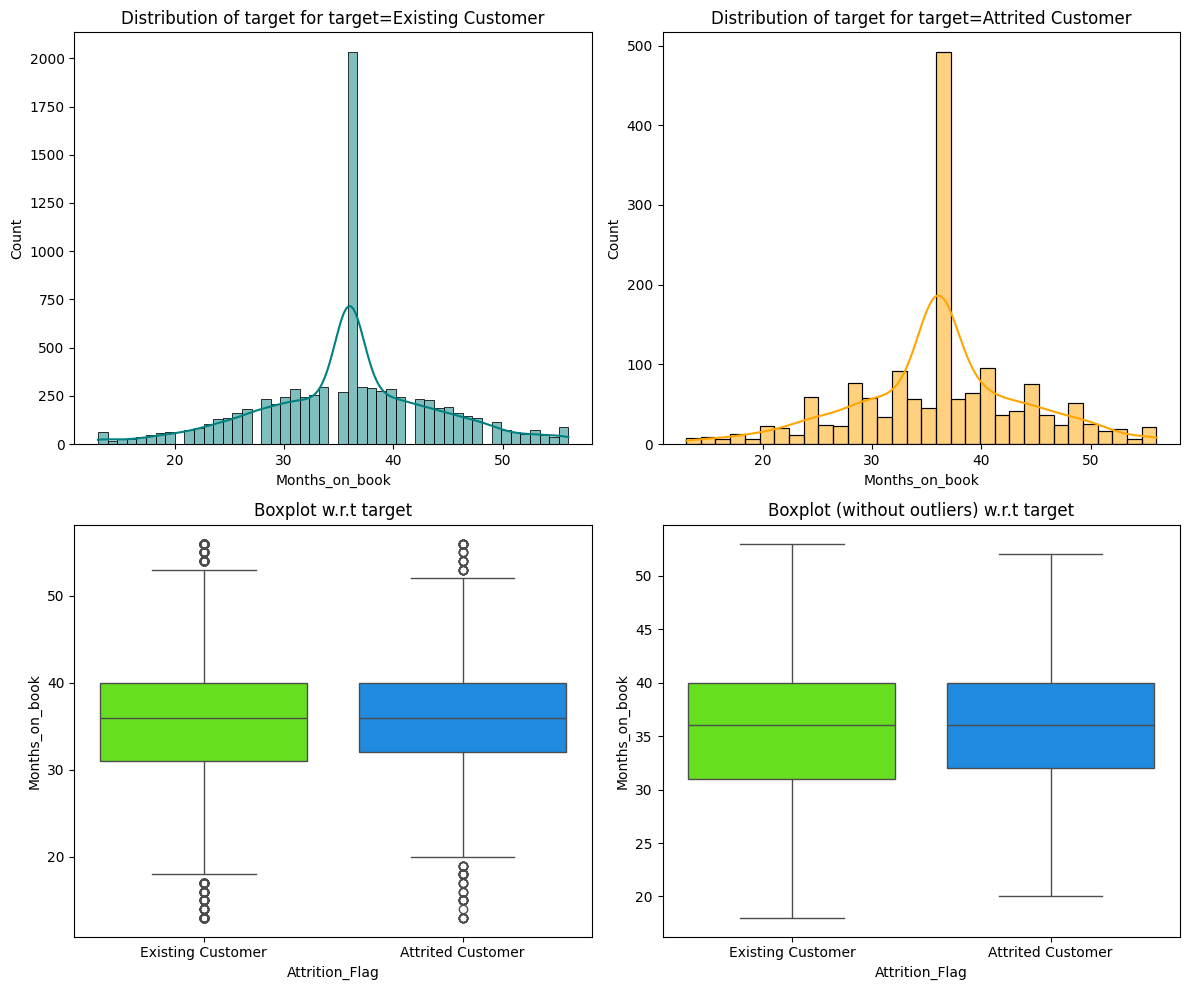

In [73]:
distribution_plot_wrt_target(df, "Months_on_book", "Attrition_Flag")

* The months_on_book has the same median in both groups
* There are some high and low outliers

`Attrition_Flag vs Total_Revolving_Bal`

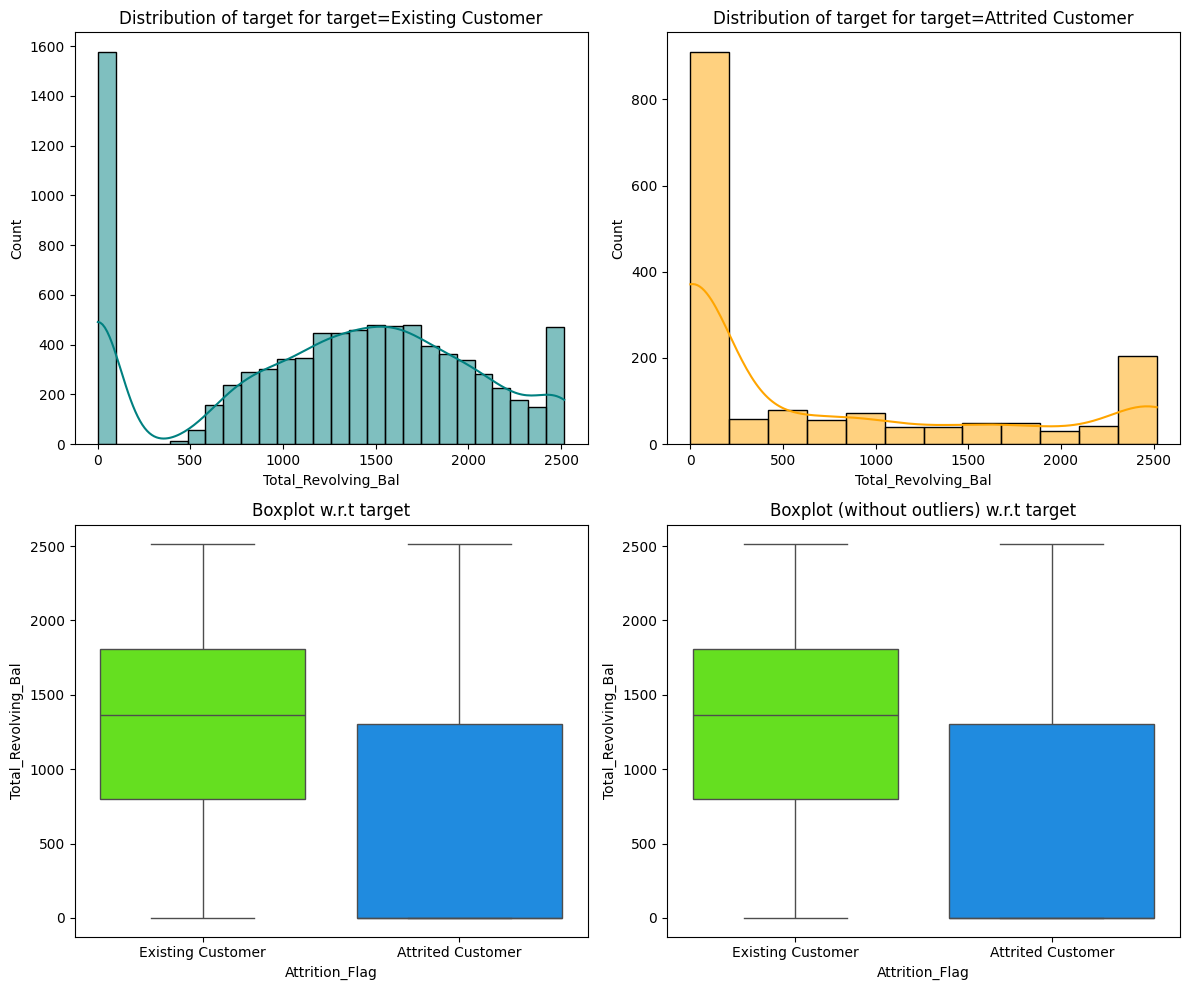

In [74]:
distribution_plot_wrt_target(df, "Total_Revolving_Bal", "Attrition_Flag")

* Existing customers has a higher median in total_revolving_bal

`Attrition_Flag vs Avg_Open_To_Buy`

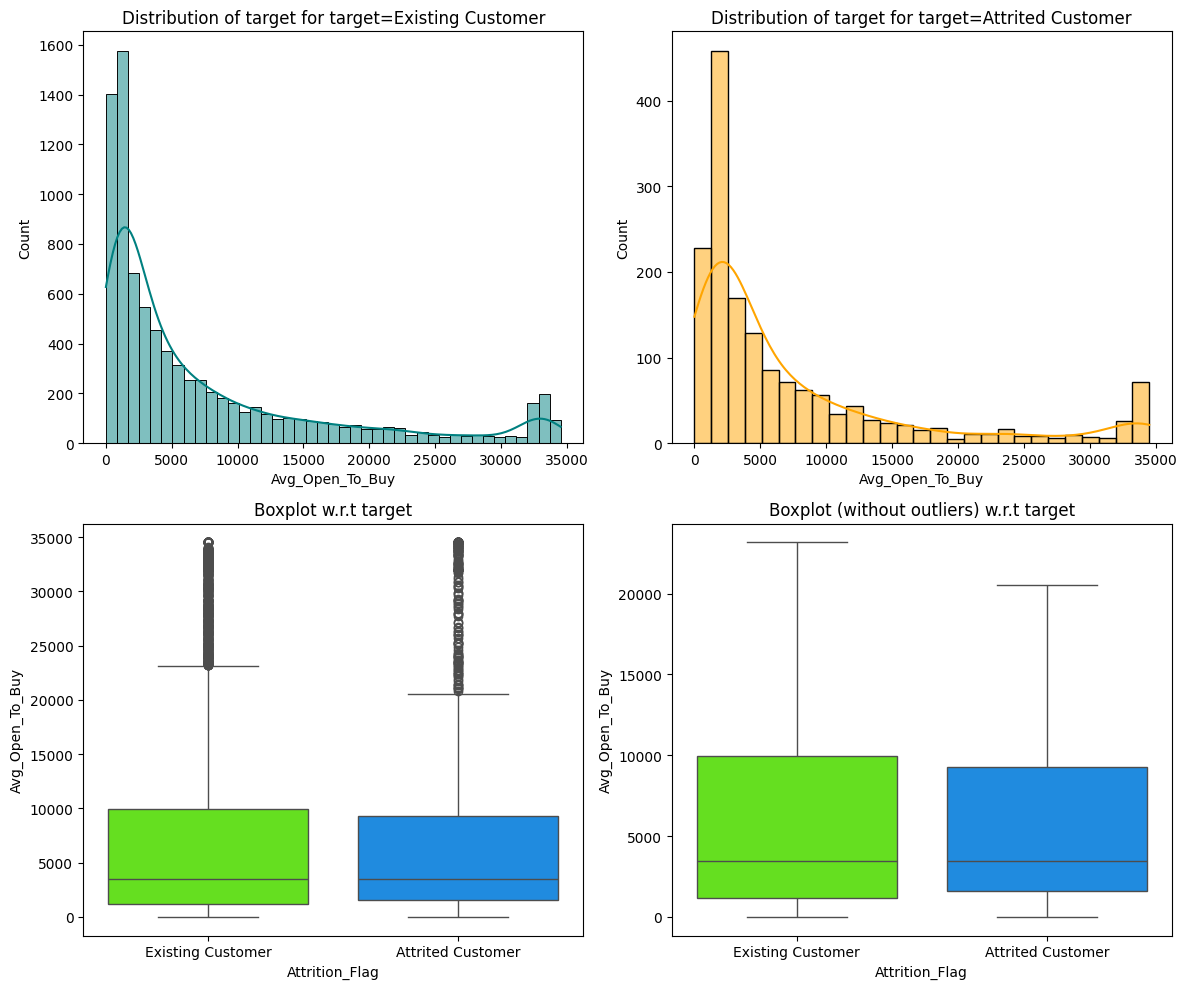

In [75]:
distribution_plot_wrt_target(df, "Avg_Open_To_Buy", "Attrition_Flag")

* The median for both groups in AVG_Open_To_buy is the same
* There are some high outliers

## Data Pre-processing

In [76]:
# Replace abc in Income_Category with nan
df['Income_Category'] = df['Income_Category'].replace('abc', np.nan)

In [77]:
df.isnull().sum()

Attrition_Flag                 0
Customer_Age                   0
Gender                         0
Dependent_count                0
Education_Level             1519
Marital_Status               749
Income_Category             1112
Card_Category                  0
Months_on_book                 0
Total_Relationship_Count       0
Months_Inactive_12_mon         0
Contacts_Count_12_mon          0
Credit_Limit                   0
Total_Revolving_Bal            0
Avg_Open_To_Buy                0
Total_Amt_Chng_Q4_Q1           0
Total_Trans_Amt                0
Total_Trans_Ct                 0
Total_Ct_Chng_Q4_Q1            0
Avg_Utilization_Ratio          0
dtype: int64

### Outlier Detection

In [78]:
# To find the 25th percentile
Q1 = df.quantile(0.25)
# To find the 75th percentile
Q3 = df.quantile(0.75)

IQR = Q3 - Q1  # Inter Quantile Range (75th perentile - 25th percentile)

# Finding lower and upper bounds for all values. All values outside these bounds are outliers
lower = (Q1 - (1.5 * IQR))
upper = (Q3 + (1.5 * IQR))

In [79]:
# checking the % outliers
((df.select_dtypes(include=["float64", "int64"]) < lower) | (df.select_dtypes(include=["float64", "int64"]) > upper)).sum() / len(df) * 100

Customer_Age               0.020
Dependent_count            0.000
Months_on_book             3.812
Total_Relationship_Count   0.000
Months_Inactive_12_mon     3.268
Contacts_Count_12_mon      6.211
Credit_Limit               9.717
Total_Revolving_Bal        0.000
Avg_Open_To_Buy            9.509
Total_Amt_Chng_Q4_Q1       3.910
Total_Trans_Amt            8.848
Total_Trans_Ct             0.020
Total_Ct_Chng_Q4_Q1        3.891
Avg_Utilization_Ratio      0.000
dtype: float64

* There are some outliers but will keep them as they are actual data.

### Feature Engineering

In [80]:
data1 = df.copy()

In [81]:
# we need to pass numerical values for each categorical column for imputation so we will label encode them

income_Category = {
    "Less than $40K": 0,
    "$40K - $60K": 1,
    "$60K - $80K": 2,
    "$80K - $120K": 3,
    "$120K +": 4,
}
data1["Income_Category"] = data1["Income_Category"].map(income_Category)

marital_Status = {
    "Married": 0,
    "Single": 1,
    "Divorced": 2,
}
data1["Marital_Status"] = data1["Marital_Status"].map(marital_Status)


education_level = {
    "Uneducated": 0,
    "High School": 1,
    "College": 2,
    "Graduate": 3,
    "Post-Graduate": 4,
    "Doctorate" : 5
}
data1["Education_Level"] = data1["Education_Level"].map(education_level)


In [82]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  object 
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  object 
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           8608 non-null   float64
 5   Marital_Status            9378 non-null   float64
 6   Income_Category           9015 non-null   float64
 7   Card_Category             10127 non-null  object 
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  
 14  Avg_Op

In [83]:
data1.head()

Attrition_Flag  Customer_Age Gender  Dependent_count  Education_Level  \
0  Existing Customer            45      M                3            1.000   
1  Existing Customer            49      F                5            3.000   
2  Existing Customer            51      M                3            3.000   
3  Existing Customer            40      F                4            1.000   
4  Existing Customer            40      M                3            0.000   

   Marital_Status  Income_Category Card_Category  Months_on_book  \
0           0.000            2.000          Blue              39   
1           1.000            0.000          Blue              44   
2           0.000            3.000          Blue              36   
3             NaN            0.000          Blue              34   
4           0.000            2.000          Blue              21   

   Total_Relationship_Count  Months_Inactive_12_mon  Contacts_Count_12_mon  \
0                         5                       1                      3   
1                         6                       1                      2   
2                         4                       1                      0   
3                         3                       4                      1   
4                         5                       1                      0   

   Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  \
0     12691.000                  777        11914.000                 1.335   
1      8256.000                  864         7392.000                 1.541   
2      3418.000                    0         3418.000                 2.594   
3      3313.000                 2517          796.000                 1.405   
4      4716.000                    0         4716.000                 2.175   

   Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
0             1144              42                1.625                  0.061  
1             1291              33                3.714                  0.105  
2             1887              20                2.333                  0.000  
3             1171              20                2.333                  0.760  
4              816              28                2.500                  0.000

* Values have been encoded.
* We will do missing value imputation after splitting the data into train, test and validation to avoid data leakage

### Data Preparation for Modeling

In [84]:
data1.value_counts('Attrition_Flag')

Attrition_Flag
Existing Customer    8500
Attrited Customer    1627
dtype: int64

In [85]:
# Dividing train data into X and y

X = data1.drop(["Attrition_Flag"], axis=1)
y = data1["Attrition_Flag"].apply(lambda x: 1 if x == "Attrited Customer" else 0)

In [86]:
y.value_counts()

0    8500
1    1627
Name: Attrition_Flag, dtype: int64

In [87]:
# Splitting data into training, validation and test set:
# first we split data into 2 parts, say temporary and test

X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1, stratify=y
)

# then we split the temporary set into train and validation

X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.25, random_state=1, stratify=y_temp
)
print(X_train.shape, X_val.shape, X_test.shape)


(6075, 19) (2026, 19) (2026, 19)


In [88]:
print("Number of rows in train data =", X_train.shape[0])
print("Number of rows in validation data =", X_val.shape[0])
print("Number of rows in test data =", X_test.shape[0])

Number of rows in train data = 6075
Number of rows in validation data = 2026
Number of rows in test data = 2026


## Missing value imputation




In [89]:
df.isnull().sum()

Attrition_Flag                 0
Customer_Age                   0
Gender                         0
Dependent_count                0
Education_Level             1519
Marital_Status               749
Income_Category             1112
Card_Category                  0
Months_on_book                 0
Total_Relationship_Count       0
Months_Inactive_12_mon         0
Contacts_Count_12_mon          0
Credit_Limit                   0
Total_Revolving_Bal            0
Avg_Open_To_Buy                0
Total_Amt_Chng_Q4_Q1           0
Total_Trans_Amt                0
Total_Trans_Ct                 0
Total_Ct_Chng_Q4_Q1            0
Avg_Utilization_Ratio          0
dtype: int64

In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  object 
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  object 
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           8608 non-null   object 
 5   Marital_Status            9378 non-null   object 
 6   Income_Category           9015 non-null   object 
 7   Card_Category             10127 non-null  object 
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  
 14  Avg_Op

In [91]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  object 
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  object 
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           8608 non-null   float64
 5   Marital_Status            9378 non-null   float64
 6   Income_Category           9015 non-null   float64
 7   Card_Category             10127 non-null  object 
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  
 14  Avg_Op

In [92]:
# Get list of categorical and numerical columns
cat_cols = list(X_train.select_dtypes(include='object').columns)
num_cols = list(X_train.select_dtypes(include=['int', 'float']).columns)

# Impute categorical columns
cat_imputer = SimpleImputer(strategy='most_frequent')
X_train[cat_cols] = cat_imputer.fit_transform(X_train[cat_cols])
X_val[cat_cols] = cat_imputer.transform(X_val[cat_cols])
X_test[cat_cols] = cat_imputer.transform(X_test[cat_cols])

# Impute numerical columns
num_imputer = SimpleImputer(strategy='mean')
X_train[num_cols] = num_imputer.fit_transform(X_train[num_cols])
X_val[num_cols] = num_imputer.transform(X_val[num_cols])
X_test[num_cols] = num_imputer.transform(X_test[num_cols])

In [93]:
# Checking that no column has missing values in train or test sets
print(X_train.isna().sum())
print("-" * 30)
print(X_val.isna().sum())
print("-" * 30)
print(X_test.isna().sum())

Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64
------------------------------
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal       

* All missing values have been treated.
* Let's inverse map the encoded values.

### Reverse Mapping for Encoded Variables

In [94]:
# Function to inverse the encoding
def inverse_mapping(x, y):
    inv_dict = {v: k for k, v in x.items()}
    X_train[y] = np.round(X_train[y]).map(inv_dict).astype("category")
    X_val[y] = np.round(X_val[y]).map(inv_dict).astype("category")
    X_test[y] = np.round(X_test[y]).map(inv_dict).astype("category")

In [95]:
inverse_mapping(income_Category, "Income_Category")
inverse_mapping(education_level, "Education_Level")
inverse_mapping(marital_Status, "Marital_Status")


In [96]:
# convert Gender to category
X_train["Gender"] = X_train["Gender"].astype("category")
X_val["Gender"] = X_val["Gender"].astype("category")
X_test["Gender"] = X_test["Gender"].astype("category")

# convert Card_Category to category
X_train["Card_Category"] = X_train["Card_Category"].astype("category")
X_val["Card_Category"] = X_val["Card_Category"].astype("category")
X_test["Card_Category"] = X_test["Card_Category"].astype("category")

* Checking inverse mapped values/categories.

`Train Dataset`

In [97]:
cols = X_train.select_dtypes(include=["object", "category"])
for i in cols.columns:
    print(X_train[i].value_counts())
    print("*" * 30)

F    3193
M    2882
Name: Gender, dtype: int64
******************************
Graduate         1854
College          1546
High School      1228
Uneducated        881
Post-Graduate     312
Doctorate         254
Name: Education_Level, dtype: int64
******************************
Single      2826
Married     2819
Divorced     430
Name: Marital_Status, dtype: int64
******************************
Less than $40K    2129
$40K - $60K       1713
$80K - $120K       953
$60K - $80K        831
$120K +            449
Name: Income_Category, dtype: int64
******************************
Blue        5655
Silver       339
Gold          69
Platinum      12
Name: Card_Category, dtype: int64
******************************


`Validation Dataset`

In [98]:
cols = X_val.select_dtypes(include=["object", "category"])
for i in cols.columns:
    print(X_val[i].value_counts())
    print("*" * 30)

F    1095
M     931
Name: Gender, dtype: int64
******************************
Graduate         623
College          493
High School      404
Uneducated       306
Post-Graduate    101
Doctorate         99
Name: Education_Level, dtype: int64
******************************
Married     960
Single      910
Divorced    156
Name: Marital_Status, dtype: int64
******************************
Less than $40K    736
$40K - $60K       582
$80K - $120K      293
$60K - $80K       279
$120K +           136
Name: Income_Category, dtype: int64
******************************
Blue        1905
Silver        97
Gold          21
Platinum       3
Name: Card_Category, dtype: int64
******************************


`Test Dataset`

In [99]:
cols = X_test.select_dtypes(include=["object", "category"])
for i in cols.columns:
    print(X_test[i].value_counts())
    print("*" * 30)

F    1070
M     956
Name: Gender, dtype: int64
******************************
Graduate         651
College          493
High School      381
Uneducated       300
Post-Graduate    103
Doctorate         98
Name: Education_Level, dtype: int64
******************************
Single      956
Married     908
Divorced    162
Name: Marital_Status, dtype: int64
******************************
Less than $40K    696
$40K - $60K       607
$60K - $80K       292
$80K - $120K      289
$120K +           142
Name: Income_Category, dtype: int64
******************************
Blue        1876
Silver       119
Gold          26
Platinum       5
Name: Card_Category, dtype: int64
******************************


### Creating Dummy Variables

In [100]:
X_train = pd.get_dummies(X_train, drop_first=True)
X_val = pd.get_dummies(X_val, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)
print(X_train.shape, X_val.shape, X_test.shape)

(6075, 29) (2026, 29) (2026, 29)


In [101]:
# check the top 5 rows from the train dataset
X_train.head()

Customer_Age  Dependent_count  Months_on_book  Total_Relationship_Count  \
800         40.000            2.000          21.000                     6.000   
498         44.000            1.000          34.000                     6.000   
4356        48.000            4.000          36.000                     5.000   
407         41.000            2.000          36.000                     6.000   
8728        46.000            4.000          36.000                     2.000   

      Months_Inactive_12_mon  Contacts_Count_12_mon  Credit_Limit  \
800                    4.000                  3.000     20056.000   
498                    2.000                  0.000      2885.000   
4356                   1.000                  2.000      6798.000   
407                    2.000                  0.000     27000.000   
8728                   2.000                  3.000     15034.000   

      Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  \
800              1602.000        18454.000                 0.466   
498              1895.000          990.000                 0.387   
4356             2517.000         4281.000                 0.873   
407                 0.000        27000.000                 0.610   
8728             1356.000        13678.000                 0.754   

      Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  \
800          1687.000          46.000                0.533   
498          1366.000          31.000                0.632   
4356         4327.000          79.000                0.881   
407          1209.000          39.000                0.300   
8728         7737.000          84.000                0.750   

      Avg_Utilization_Ratio  Gender_M  Education_Level_Doctorate  \
800                   0.080         1                          0   
498                   0.657         1                          0   
4356                  0.370         1                          0   
407                   0.000         1                          0   
8728                  0.090         1                          0   

      Education_Level_Graduate  Education_Level_High School  \
800                          0                            0   
498                          0                            0   
4356                         0                            1   
407                          1                            0   
8728                         0                            1   

      Education_Level_Post-Graduate  Education_Level_Uneducated  \
800                               0                           0   
498                               0                           0   
4356                              0                           0   
407                               0                           0   
8728                              0                           0   

      Marital_Status_Married  Marital_Status_Single  \
800                        0                      1   
498                        1                      0   
4356                       1                      0   
407                        0                      1   
8728                       0                      0   

      Income_Category_$40K - $60K  Income_Category_$60K - $80K  \
800                             0                            0   
498                             1                            0   
4356                            0                            0   
407                             0                            1   
8728                            1                            0   

      Income_Category_$80K - $120K  Income_Category_Less than $40K  \
800                              0                               0   
498                              0                               0   
4356                             1                               0   
407                              0                               0   
8728                             0                   

* After encoding there are 29 columns.

## Model Building

### Model evaluation criterion

The nature of predictions made by the classification model will translate as follows:

- True positives (TP) are failures correctly predicted by the model.
- False negatives (FN) are real failures in a generator where there is no detection by model.
- False positives (FP) are failure detections in a generator where there is no failure.

**Which metric to optimize?**

* We need to choose the metric which will ensure that the maximum number of generator failures are predicted correctly by the model.
* We would want Recall to be maximized as greater the Recall, the higher the chances of minimizing false negatives.
* We want to minimize false negatives because if a model predicts that a machine will have no failure when there will be a failure, it will increase the maintenance cost.

**Let's define a function to output different metrics (including recall) on the train and test set and a function to show confusion matrix so that we do not have to use the same code repetitively while evaluating models.**

In [102]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1

        },
        index=[0],
    )

    return df_perf

In [103]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

### Model Building with original data

Sample code for model building with original data

In [104]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Bagging", BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=1, class_weight='balanced'), random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1, class_weight='balanced')))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("XGBoost", XGBClassifier(random_state=1)))
models.append(("dtree", DecisionTreeClassifier(random_state=1, class_weight='balanced')))

print("\n" "Training Performance:" "\n")
for name, model in models:
    model.fit(X_train, y_train)
    scores = recall_score(y_train, model.predict(X_train))
    print("{}: {}".format(name, scores))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train, y_train)
    scores_val = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores_val))


Training Performance:

Bagging: 0.9795081967213115
Random forest: 1.0
GBM: 0.8780737704918032
Adaboost: 0.8381147540983607
XGBoost: 1.0
dtree: 1.0

Validation Performance:

Bagging: 0.7668711656441718
Random forest: 0.7638036809815951
GBM: 0.8619631901840491
Adaboost: 0.8588957055214724
XGBoost: 0.8926380368098159
dtree: 0.8006134969325154


In [105]:
print("\nTraining and Validation Performance Difference:\n")

for name, model in models:
    model.fit(X_train, y_train)
    scores_train = recall_score(y_train, model.predict(X_train))
    scores_val = recall_score(y_val, model.predict(X_val))
    difference1 = scores_train - scores_val
    print("{}: Training Score: {:.4f}, Validation Score: {:.4f}, Difference: {:.4f}".format(name, scores_train, scores_val, difference1))


Training and Validation Performance Difference:

Bagging: Training Score: 0.9795, Validation Score: 0.7669, Difference: 0.2126
Random forest: Training Score: 1.0000, Validation Score: 0.7638, Difference: 0.2362
GBM: Training Score: 0.8781, Validation Score: 0.8620, Difference: 0.0161
Adaboost: Training Score: 0.8381, Validation Score: 0.8589, Difference: -0.0208
XGBoost: Training Score: 1.0000, Validation Score: 0.8926, Difference: 0.1074
dtree: Training Score: 1.0000, Validation Score: 0.8006, Difference: 0.1994


* XGBoost has the best performance followed by Gradient Boost model as per the validation performance

### Model Building with Oversampled data


In [106]:
print("Before Oversampling, counts of label 'Attrited Customer': {}".format(sum(y_train == 1)))
print("Before Oversampling, counts of label 'Existing Customer': {} \n".format(sum(y_train == 0)))

# Synthetic Minority Over Sampling Technique
sm = SMOTE(sampling_strategy=1, k_neighbors=5, random_state=1)
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)

print("After Oversampling, counts of label 'Attrited Customer': {}".format(sum(y_train_over == 1)))
print("After Oversampling, counts of label 'Existing Customer': {} \n".format(sum(y_train_over == 0)))


print("After Oversampling, the shape of train_X: {}".format(X_train_over.shape))
print("After Oversampling, the shape of train_y: {} \n".format(y_train_over.shape))

Before Oversampling, counts of label 'Attrited Customer': 976
Before Oversampling, counts of label 'Existing Customer': 5099 

After Oversampling, counts of label 'Attrited Customer': 5099
After Oversampling, counts of label 'Existing Customer': 5099 

After Oversampling, the shape of train_X: (10198, 29)
After Oversampling, the shape of train_y: (10198,) 



In [107]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Bagging", BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=1, class_weight='balanced'), random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1, class_weight='balanced')))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("XGBoost", XGBClassifier(random_state=1)))
models.append(("dtree", DecisionTreeClassifier(random_state=1, class_weight='balanced')))


print("\n" "Training Performance:" "\n")
for name, model in models:
    model.fit(X_train_over, y_train_over)
    scores = recall_score(y_train_over, model.predict(X_train_over))
    print("{}: {}".format(name, scores))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train_over, y_train_over)
    scores = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores))


Training Performance:

Bagging: 0.9978427142576975
Random forest: 1.0
GBM: 0.982349480290253
Adaboost: 0.9664640125514807
XGBoost: 1.0
dtree: 1.0

Validation Performance:

Bagging: 0.852760736196319
Random forest: 0.8374233128834356
GBM: 0.8865030674846626
Adaboost: 0.8650306748466258
XGBoost: 0.8987730061349694
dtree: 0.8282208588957055


In [108]:
print("\nTraining and Validation Performance Difference:\n")

for name, model in models:
    model.fit(X_train_over, y_train_over)
    scores_train = recall_score(y_train_over, model.predict(X_train_over))
    scores_val = recall_score(y_val, model.predict(X_val))
    difference2 = scores_train - scores_val
    print("{}: Training Score: {:.4f}, Validation Score: {:.4f}, Difference: {:.4f}".format(name, scores_train, scores_val, difference2))


Training and Validation Performance Difference:

Bagging: Training Score: 0.9978, Validation Score: 0.8528, Difference: 0.1451
Random forest: Training Score: 1.0000, Validation Score: 0.8374, Difference: 0.1626
GBM: Training Score: 0.9823, Validation Score: 0.8865, Difference: 0.0958
Adaboost: Training Score: 0.9665, Validation Score: 0.8650, Difference: 0.1014
XGBoost: Training Score: 1.0000, Validation Score: 0.8988, Difference: 0.1012
dtree: Training Score: 1.0000, Validation Score: 0.8282, Difference: 0.1718


* XGBoost has the best performance followed by Gradient Boost model as per the validation performance

### Model Building with Undersampled data

In [109]:
# Random undersampler for under sampling the data
rus = RandomUnderSampler(random_state=1)
X_train_un, y_train_un = rus.fit_resample(X_train, y_train)

In [110]:
print("Before Under Sampling, counts of label 'Attrited Customer': {}".format(sum(y_train == 1)))
print("Before Under Sampling, counts of label 'Existing Customer': {} \n".format(sum(y_train == 0)))

print("After Under Sampling, counts of label 'Attrited Customer': {}".format(sum(y_train_un == 1)))
print("After Under Sampling, counts of label 'Existing Customer': {} \n".format(sum(y_train_un == 0)))

print("After Under Sampling, the shape of train_X: {}".format(X_train_un.shape))
print("After Under Sampling, the shape of train_y: {} \n".format(y_train_un.shape))

Before Under Sampling, counts of label 'Attrited Customer': 976
Before Under Sampling, counts of label 'Existing Customer': 5099 

After Under Sampling, counts of label 'Attrited Customer': 976
After Under Sampling, counts of label 'Existing Customer': 976 

After Under Sampling, the shape of train_X: (1952, 29)
After Under Sampling, the shape of train_y: (1952,) 



In [111]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Bagging", BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=1, class_weight='balanced'), random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1, class_weight='balanced')))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("XGBoost", XGBClassifier(random_state=1)))
models.append(("dtree", DecisionTreeClassifier(random_state=1, class_weight='balanced')))


print("\n" "Training Performance:" "\n")
for name, model in models:
    model.fit(X_train_un, y_train_un)
    scores = recall_score(y_train_un, model.predict(X_train_un))
    print("{}: {}".format(name, scores))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train_un, y_train_un)
    scores = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores))


Training Performance:

Bagging: 0.9907786885245902
Random forest: 1.0
GBM: 0.9805327868852459
Adaboost: 0.9528688524590164
XGBoost: 1.0
dtree: 1.0

Validation Performance:

Bagging: 0.9325153374233128
Random forest: 0.9294478527607362
GBM: 0.9601226993865031
Adaboost: 0.9601226993865031
XGBoost: 0.9601226993865031
dtree: 0.9171779141104295


In [112]:
print("\nTraining and Validation Performance Difference:\n")

for name, model in models:
    model.fit(X_train_un, y_train_un)
    scores_train = recall_score(y_train_un, model.predict(X_train_un))
    scores_val = recall_score(y_val, model.predict(X_val))
    difference3 = scores_train - scores_val
    print("{}: Training Score: {:.4f}, Validation Score: {:.4f}, Difference: {:.4f}".format(name, scores_train, scores_val, difference3))


Training and Validation Performance Difference:

Bagging: Training Score: 0.9908, Validation Score: 0.9325, Difference: 0.0583
Random forest: Training Score: 1.0000, Validation Score: 0.9294, Difference: 0.0706
GBM: Training Score: 0.9805, Validation Score: 0.9601, Difference: 0.0204
Adaboost: Training Score: 0.9529, Validation Score: 0.9601, Difference: -0.0073
XGBoost: Training Score: 1.0000, Validation Score: 0.9601, Difference: 0.0399
dtree: Training Score: 1.0000, Validation Score: 0.9172, Difference: 0.0828


* XGBoost has the best performance followed by Gradient Boost model as per the validation performance

*  After building 18 models, it was observed that both the XGBoost and GBM and Ada boost models, exhibited strong performance on both the training and validation datasets.
*  Sometimes models might overfit after undersampling and oversampling, so it's better to tune the models to get a generalized performance
* The best 3 models are XGBoost and GBM and Ada Boost models will tune them with original, over-sampled and under-sampled and compare them and will choose the best model among them.

### HyperparameterTuning

#### Sample Parameter Grids

**Note**

1. Sample parameter grids have been provided to do necessary hyperparameter tuning. These sample grids are expected to provide a balance between model performance improvement and execution time. One can extend/reduce the parameter grid based on execution time and system configuration.
  - Please note that if the parameter grid is extended to improve the model performance further, the execution time will increase


- For Gradient Boosting:

```
param_grid = {
    "init": [AdaBoostClassifier(random_state=1),DecisionTreeClassifier(random_state=1)],
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "subsample":[0.7,0.9],
    "max_features":[0.5,0.7,1],
}
```

- For Adaboost:

```
param_grid = {
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "base_estimator": [
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}
```

- For Bagging Classifier:

```
param_grid = {
    'max_samples': [0.8,0.9,1],
    'max_features': [0.7,0.8,0.9],
    'n_estimators' : [30,50,70],
}
```
- For Random Forest:

```
param_grid = {
    "n_estimators": [50,110,25],
    "min_samples_leaf": np.arange(1, 4),
    "max_features": [np.arange(0.3, 0.6, 0.1),'sqrt'],
    "max_samples": np.arange(0.4, 0.7, 0.1)
}
```

- For Decision Trees:

```
param_grid = {
    'max_depth': np.arange(2,6),
    'min_samples_leaf': [1, 4, 7],
    'max_leaf_nodes' : [10, 15],
    'min_impurity_decrease': [0.0001,0.001]
}
```

- For XGBoost (optional):

```
param_grid={'n_estimators':np.arange(50,110,25),
            'scale_pos_weight':[1,2,5],
            'learning_rate':[0.01,0.1,0.05],
            'gamma':[1,3],
            'subsample':[0.7,0.9]
}
```

#### Tuning method for XGBoost with original data

In [113]:
%%time

# defining model
Model = XGBClassifier(random_state=1,eval_metric='logloss')

#Parameter grid to pass in RandomSearchCV
param_grid={'n_estimators':np.arange(50,110,25),
            'scale_pos_weight':[1,2,5],
            'learning_rate':[0.01,0.1,0.05],
            'gamma':[1,3],
            'subsample':[0.7,0.9]
           }
from sklearn import metrics

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=50, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train, y_train)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 0.9, 'scale_pos_weight': 5, 'n_estimators': 100, 'learning_rate': 0.05, 'gamma': 3} with CV score=0.923150183150183:
CPU times: user 1.1 s, sys: 997 ms, total: 2.1 s
Wall time: 3.05 s


In [114]:
tuned_XGB_original = XGBClassifier(
    random_state=1,
    eval_metric='logloss',
    subsample= 0.9,
    scale_pos_weight= 5,
    n_estimators= 100,
    learning_rate= 0.05,
    gamma= 3
)
tuned_XGB_original.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=3, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.05, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, random_state=1, ...)

In [115]:
# Checking model's performance on training set
xgb_train_original = model_performance_classification_sklearn(tuned_XGB_original, X_train, y_train)
xgb_train_original

Accuracy  Recall  Precision    F1
0     0.981   0.999      0.897 0.945

In [116]:
# Checking model's performance on validation set
xgb_val_original = model_performance_classification_sklearn(tuned_XGB_original, X_val, y_val)
xgb_val_original

Accuracy  Recall  Precision    F1
0     0.961   0.948      0.831 0.885

#### Tuning method for XGBoost with oversampled data

In [117]:
%%time

# defining model
Model = XGBClassifier(random_state=1,eval_metric='logloss')

#Parameter grid to pass in RandomSearchCV
param_grid={'n_estimators':np.arange(50,110,25),
            'scale_pos_weight':[1,2,5],
            'learning_rate':[0.01,0.1,0.05],
            'gamma':[1,3],
            'subsample':[0.7,0.9]
           }
from sklearn import metrics

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=50, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over, y_train_over)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 0.7, 'scale_pos_weight': 5, 'n_estimators': 50, 'learning_rate': 0.01, 'gamma': 3} with CV score=0.9998039215686274:
CPU times: user 717 ms, sys: 502 ms, total: 1.22 s
Wall time: 2.53 s


In [118]:
tuned_XGB_over = XGBClassifier(
    random_state=1,
    eval_metric='logloss',
    subsample= 0.7,
    scale_pos_weight= 5,
    n_estimators= 50,
    learning_rate= 0.01,
    gamma= 3
)
tuned_XGB_over.fit(X_train_over, y_train_over)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=3, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.01, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=50,
              n_jobs=None, num_parallel_tree=None, random_state=1, ...)

In [119]:
# Checking model's performance on training set
xgb_train_over = model_performance_classification_sklearn(tuned_XGB_over, X_train_over, y_train_over)
xgb_train_over

Accuracy  Recall  Precision    F1
0     0.795   1.000      0.709 0.830

In [120]:
# Checking model's performance on validation set
xgb_val_over = model_performance_classification_sklearn(tuned_XGB_over, X_val, y_val)
xgb_val_over

Accuracy  Recall  Precision    F1
0     0.657   1.000      0.319 0.484

#### Tuning method for XGBoost with undersampled data

In [121]:
%%time

# defining model
Model = XGBClassifier(random_state=1,eval_metric='logloss')

#Parameter grid to pass in RandomSearchCV
param_grid={'n_estimators':np.arange(50,110,25),
            'scale_pos_weight':[1,2,5],
            'learning_rate':[0.01,0.1,0.05],
            'gamma':[1,3],
            'subsample':[0.7,0.9]
           }
from sklearn import metrics

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=50, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un, y_train_un)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 0.7, 'scale_pos_weight': 5, 'n_estimators': 50, 'learning_rate': 0.01, 'gamma': 3} with CV score=0.9979591836734695:
CPU times: user 586 ms, sys: 451 ms, total: 1.04 s
Wall time: 998 ms


In [122]:
tuned_XGB_under = XGBClassifier(
    random_state=1,
    eval_metric='logloss',
    subsample= 0.7,
    scale_pos_weight= 5, 
    n_estimators= 50, 
    learning_rate= 0.01, 
    gamma= 3
)
tuned_XGB_under.fit(X_train_un, y_train_un)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=3, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.01, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=50,
              n_jobs=None, num_parallel_tree=None, random_state=1, ...)

In [123]:
# Checking model's performance on training set
xgb_train_under = model_performance_classification_sklearn(tuned_XGB_under, X_train_un, y_train_un) 
xgb_train_under

Accuracy  Recall  Precision    F1
0     0.764   1.000      0.680 0.809

In [124]:
# Checking model's performance on validation set
xgb_val_under = model_performance_classification_sklearn(tuned_XGB_under, X_val, y_val)
xgb_val_under

Accuracy  Recall  Precision    F1
0     0.593   1.000      0.283 0.442

#### Tuning method for GBM with original data

In [125]:
# defining model
Model = GradientBoostingClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
    "init": [AdaBoostClassifier(random_state=1),DecisionTreeClassifier(random_state=1)],
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "subsample":[0.7,0.9],
    "max_features":[0.5,0.7,1],
}
# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=50, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train, y_train)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 0.9, 'n_estimators': 100, 'max_features': 0.5, 'learning_rate': 0.1, 'init': AdaBoostClassifier(random_state=1)} with CV score=0.8114704343275772:


In [126]:
tuned_GBM_original = GradientBoostingClassifier(
    random_state=1,
    subsample = 0.9,
    n_estimators = 100,
    max_features = 0.5,
    learning_rate = 0.1,
    init = AdaBoostClassifier(random_state=1)
)
tuned_GBM_original.fit(X_train, y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           max_features=0.5, random_state=1, subsample=0.9)

In [127]:
# Checking model's performance on training set
gbm_train_original = model_performance_classification_sklearn(tuned_GBM_original, X_train, y_train)
gbm_train_original

Accuracy  Recall  Precision    F1
0     0.973   0.870      0.957 0.911

In [128]:
# Checking model's performance on validation set
gbm_val_original = model_performance_classification_sklearn(tuned_GBM_original, X_val, y_val)
gbm_val_original

Accuracy  Recall  Precision    F1
0     0.969   0.856      0.946 0.899

#### Tuning method for GBM with oversampled data

In [129]:
# defining model
Model = GradientBoostingClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
    "init": [AdaBoostClassifier(random_state=1),DecisionTreeClassifier(random_state=1)],
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "subsample":[0.7,0.9],
    "max_features":[0.5,0.7,1],
}
# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=50, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over, y_train_over)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 0.7, 'n_estimators': 100, 'max_features': 0.7, 'learning_rate': 0.01, 'init': AdaBoostClassifier(random_state=1)} with CV score=0.9441093728953799:


In [130]:
tuned_GBM_over = GradientBoostingClassifier(
    random_state=1,
    subsample = 0.7,
    n_estimators = 100,
    max_features = 0.7,
    learning_rate = 0.01,
    init = AdaBoostClassifier(random_state=1)
)
tuned_GBM_over.fit(X_train_over, y_train_over)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           learning_rate=0.01, max_features=0.7, random_state=1,
                           subsample=0.7)

In [131]:
# Checking model's performance on training set
gbm_train_over = model_performance_classification_sklearn(tuned_GBM_over, X_train_over, y_train_over)
gbm_train_over

Accuracy  Recall  Precision    F1
0     0.933   0.957      0.914 0.935

In [132]:
# Checking model's performance on validation set
gbm_val_over = model_performance_classification_sklearn(tuned_GBM_over, X_val, y_val)
gbm_val_over

Accuracy  Recall  Precision    F1
0     0.908   0.902      0.655 0.759

#### Tuning method for GBM with undersampled data

In [133]:
# defining model
Model = GradientBoostingClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
    "init": [AdaBoostClassifier(random_state=1),DecisionTreeClassifier(random_state=1)],
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "subsample":[0.7,0.9],
    "max_features":[0.5,0.7,1],
}
# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=50, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un, y_train_un)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 0.9, 'n_estimators': 100, 'max_features': 0.5, 'learning_rate': 0.1, 'init': AdaBoostClassifier(random_state=1)} with CV score=0.9508163265306123:


In [134]:
tuned_GBM_under = GradientBoostingClassifier(
    random_state=1,
    subsample = 0.9,
    n_estimators = 100,
    max_features = 0.5,
    learning_rate = 0.1,
    init = AdaBoostClassifier(random_state=1)
)
tuned_GBM_under.fit(X_train_un, y_train_un)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           max_features=0.5, random_state=1, subsample=0.9)

In [135]:
# Checking model's performance on training set
gbm_train_under = model_performance_classification_sklearn(tuned_GBM_under, X_train_un, y_train_un)
gbm_train_under

Accuracy  Recall  Precision    F1
0     0.975   0.983      0.968 0.975

In [136]:
# Checking model's performance on validation set
gbm_val_under = model_performance_classification_sklearn(tuned_GBM_under, X_val, y_val)
gbm_val_under

Accuracy  Recall  Precision    F1
0     0.943   0.966      0.752 0.846

#### Tuning method for Ada boos with original data

In [137]:
%%time

# defining model
Model = AdaBoostClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "estimator": [
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_jobs = -1, n_iter=50, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train, y_train)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'n_estimators': 100, 'learning_rate': 0.1, 'estimator': DecisionTreeClassifier(max_depth=3, random_state=1)} with CV score=0.8472946101517531:
CPU times: user 1.19 s, sys: 43.4 ms, total: 1.23 s
Wall time: 6.15 s


In [138]:
tuned_adb_original = AdaBoostClassifier(
    random_state=1,
    base_estimator=DecisionTreeClassifier(max_depth=3, random_state=1),
    n_estimators=100,
    learning_rate=0.1,
)
tuned_adb_original.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3,
                                                         random_state=1),
                   learning_rate=0.1, n_estimators=100, random_state=1)

In [139]:
# Checking model's performance on training set
adb_train_original = model_performance_classification_sklearn(tuned_adb_original, X_train, y_train)
adb_train_original

Accuracy  Recall  Precision    F1
0     0.983   0.926      0.966 0.946

In [140]:
# Checking model's performance on validation set
adb_val_original = model_performance_classification_sklearn(tuned_adb_original, X_val, y_val)
adb_val_original

Accuracy  Recall  Precision    F1
0     0.971   0.874      0.941 0.906

#### Tuning method for Ada boos with oversample data

In [141]:
%%time

# defining model
Model = AdaBoostClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "estimator": [
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_jobs = -1, n_iter=50, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over, y_train_over)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'n_estimators': 100, 'learning_rate': 0.01, 'estimator': DecisionTreeClassifier(max_depth=3, random_state=1)} with CV score=0.9356797321480114:
CPU times: user 2.4 s, sys: 35.6 ms, total: 2.43 s
Wall time: 12.7 s


In [142]:
tuned_adb_over = AdaBoostClassifier(
    random_state=1,
    base_estimator=DecisionTreeClassifier(max_depth=3, random_state=1),
    n_estimators=100,
    learning_rate=0.01,
)
tuned_adb_over.fit(X_train_over, y_train_over)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3,
                                                         random_state=1),
                   learning_rate=0.01, n_estimators=100, random_state=1)

In [143]:
# Checking model's performance on training set
adb_train_over = model_performance_classification_sklearn(tuned_adb_over, X_train_over, y_train_over)
adb_train_over

Accuracy  Recall  Precision    F1
0     0.937   0.957      0.921 0.938

In [144]:
# Checking model's performance on validation set
adb_val_over = model_performance_classification_sklearn(tuned_adb_over, X_val, y_val)
adb_val_over

Accuracy  Recall  Precision    F1
0     0.914   0.883      0.679 0.768

#### Tuning method for Ada boos with undersample data

In [145]:
%%time

# defining model
Model = AdaBoostClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "estimator": [
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_jobs = -1, n_iter=50, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un, y_train_un)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'n_estimators': 100, 'learning_rate': 0.05, 'estimator': DecisionTreeClassifier(max_depth=3, random_state=1)} with CV score=0.9436682365253795:
CPU times: user 415 ms, sys: 14.7 ms, total: 430 ms
Wall time: 2.08 s


In [146]:
tuned_adb_un = AdaBoostClassifier(
    random_state=1,
    base_estimator=DecisionTreeClassifier(max_depth=3, random_state=1),
    n_estimators=100,
    learning_rate=0.05,
)
tuned_adb_un.fit(X_train_un, y_train_un)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3,
                                                         random_state=1),
                   learning_rate=0.05, n_estimators=100, random_state=1)

In [147]:
# Checking model's performance on training set
adb_train_un = model_performance_classification_sklearn(tuned_adb_un, X_train_un, y_train_un)
adb_train_un

Accuracy  Recall  Precision    F1
0     0.973   0.978      0.968 0.973

In [148]:
# Checking model's performance on validation set
adb_val_un = model_performance_classification_sklearn(tuned_adb_un, X_val, y_val)
adb_val_un

Accuracy  Recall  Precision    F1
0     0.937   0.966      0.729 0.831

## Model Comparison and Final Model Selection

In [149]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        xgb_train_original.T,
        xgb_train_over.T,
        xgb_train_under.T,

        gbm_train_original.T,
        gbm_train_over.T,
        gbm_train_under.T,

        adb_train_original.T,
        adb_train_over.T,
        adb_train_un.T,
        
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "XGboosting trained with original data",
    "XGboosting trained with Oversampled data",
    "XGboosting trained with Undersampled data",

    "Gradient boosting trained with original data",
    "Gradient boosting trained with Oversampled data",
    "Gradient boosting trained with Undersampled data",

    "Ada boosting trained with original data",
    "Ada boosting trained with Oversampled data",
    "Ada boosting trained with Undersampled data",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


XGboosting trained with original data  \
Accuracy                                   0.981   
Recall                                     0.999   
Precision                                  0.897   
F1                                         0.945   

           XGboosting trained with Oversampled data  \
Accuracy                                      0.795   
Recall                                        1.000   
Precision                                     0.709   
F1                                            0.830   

           XGboosting trained with Undersampled data  \
Accuracy                                       0.764   
Recall                                         1.000   
Precision                                      0.680   
F1                                             0.809   

           Gradient boosting trained with original data  \
Accuracy                                          0.973   
Recall                                            0.870   
Precision                                         0.957   
F1                                                0.911   

           Gradient boosting trained with Oversampled data  \
Accuracy                                             0.933   
Recall                                               0.957   
Precision                                            0.914   
F1                                                   0.935   

           Gradient boosting trained with Undersampled data  \
Accuracy                                              0.975   
Recall                                                0.983   
Precision                                             0.968   
F1                                                    0.975   

           Ada boosting trained with original data  \
Accuracy                                     0.983   
Recall                                       0.926   
Precision                                    0.966   
F1                                           0.946   

           Ada boosting trained with Oversampled data  \
Accuracy                                        0.937   
Recall                                          0.957   
Precision                                       0.921   
F1                                              0.938   

           Ada boosting trained with Undersampled data  
Accuracy                                         0.973  
Recall                                           0.978  
Precision                                        0.968  
F1                                               0.973

In [150]:
# Validation performance comparison

models_train_comp_df = pd.concat(
    [
        xgb_val_original.T,
        xgb_val_over.T,
        xgb_val_under.T,

        gbm_val_original.T,
        gbm_val_over.T,
        gbm_val_under.T,

        adb_val_original.T,
        adb_val_over.T,
        adb_val_un.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "XGboosting validation with original data",
    "XGboosting validation with Oversampled data",
    "XGboosting validation with Undersampled data",

    "Gradient boosting validation with original data",
    "Gradient boosting validation with Oversampled data",
    "Gradient boosting validation with Undersampled data",

    "Ada boosting validation with original data",
    "Ada boosting validation with Oversampled data",
    "Ada boosting validation with Undersampled data",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


XGboosting validation with original data  \
Accuracy                                      0.961   
Recall                                        0.948   
Precision                                     0.831   
F1                                            0.885   

           XGboosting validation with Oversampled data  \
Accuracy                                         0.657   
Recall                                           1.000   
Precision                                        0.319   
F1                                               0.484   

           XGboosting validation with Undersampled data  \
Accuracy                                          0.593   
Recall                                            1.000   
Precision                                         0.283   
F1                                                0.442   

           Gradient boosting validation with original data  \
Accuracy                                             0.969   
Recall                                               0.856   
Precision                                            0.946   
F1                                                   0.899   

           Gradient boosting validation with Oversampled data  \
Accuracy                                               0.908    
Recall                                                 0.902    
Precision                                              0.655    
F1                                                     0.759    

           Gradient boosting validation with Undersampled data  \
Accuracy                                               0.943     
Recall                                                 0.966     
Precision                                              0.752     
F1                                                     0.846     

           Ada boosting validation with original data  \
Accuracy                                        0.971   
Recall                                          0.874   
Precision                                       0.941   
F1                                              0.906   

           Ada boosting validation with Oversampled data  \
Accuracy                                           0.914   
Recall                                             0.883   
Precision                                          0.679   
F1                                                 0.768   

           Ada boosting validation with Undersampled data  
Accuracy                                            0.937  
Recall                                              0.966  
Precision                                           0.729  
F1                                                  0.831

* Among the models based on the validation performance will select XG boost with over sample data and GBM with under sample data and Ada boost with under sample data and will predict the test data using these three models.

### Test set final performance

`XGboosting with over sample data`

In [151]:
# Let's check the performance on test set
xgb_test = model_performance_classification_sklearn(tuned_XGB_over, X_test, y_test)
xgb_test

Accuracy  Recall  Precision    F1
0     0.640   1.000      0.308 0.471

`Gradient boosting with under sample data`

In [152]:
# Let's check the performance on test set
gbm_test = model_performance_classification_sklearn(tuned_GBM_under, X_test, y_test)
gbm_test

Accuracy  Recall  Precision    F1
0     0.941   0.963      0.743 0.839

`Ada boosting with under sample data`

In [153]:
ada_test = model_performance_classification_sklearn(tuned_adb_un, X_test, y_test)
ada_test

Accuracy  Recall  Precision    F1
0     0.933   0.966      0.717 0.823

* XGBoost trained with oversampled data(tuned_XGB_over model) has given 100% recall  and 64% accuracy on the test set this performance is in line with what we achieved with this model on the train and validation sets. so, this is a generalized model and this is the best model.

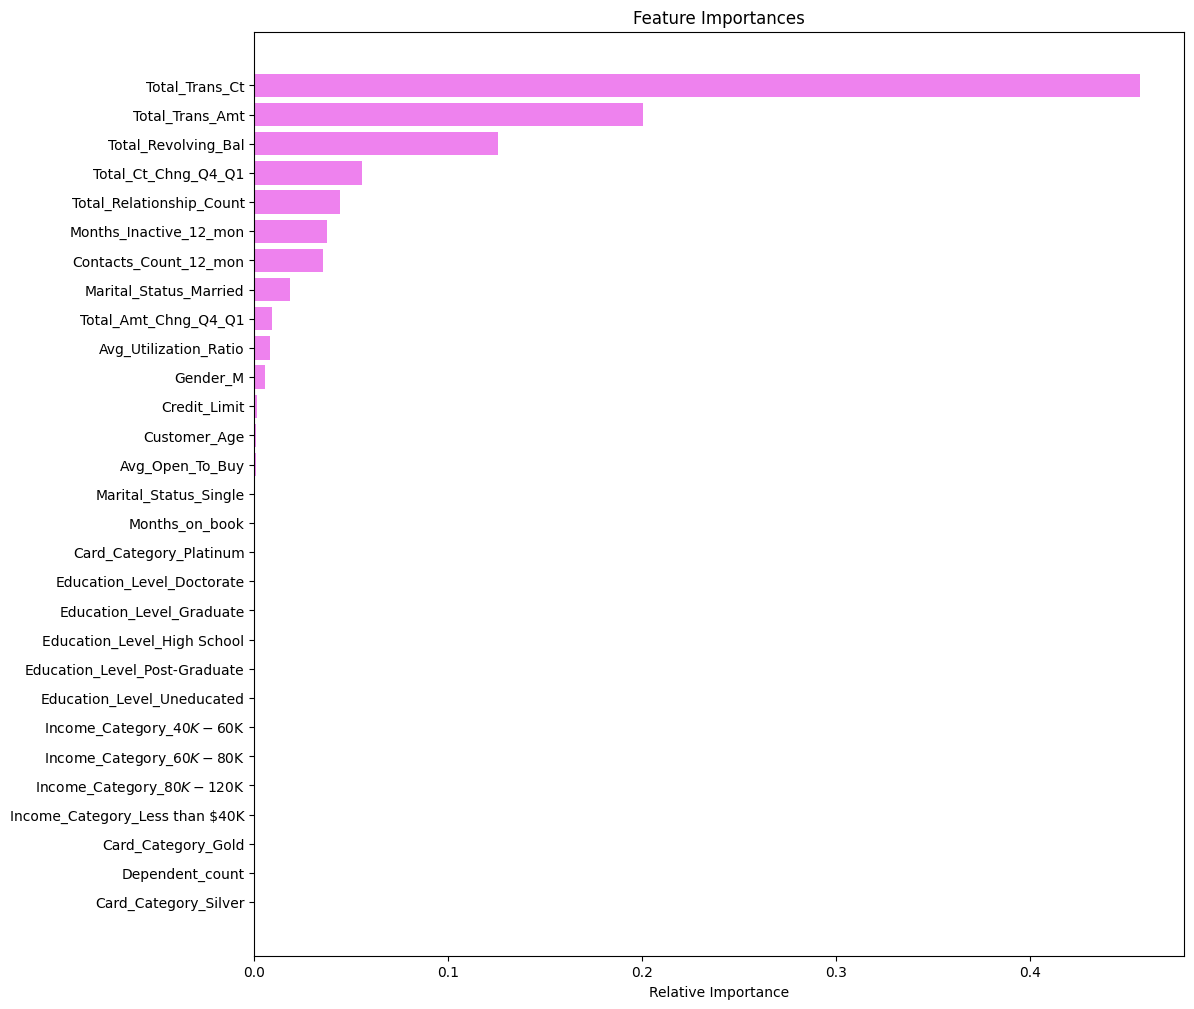

In [154]:
feature_names = X_train.columns
importances = tuned_GBM_over.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

* Based on the analysis performed, we can conclude that the XGBoost trained with oversampled data is the most effective model for predicting customer churn.

* We can see that Total_trans_ct, Total_trans_amt, Total_revolving_Bal are the top 3 important features for making predictions

# Business Insights and Conclusions

* The bank should focus on improving customer engagement by increasing the number of transactions and the total transaction amount.
They should also focus on building stronger relationships with customers by increasing the total relationship count.
Additionally, the bank should proactively reach out to customers who have had a decrease in their total contact count in the past 12 months.

By taking these steps, the bank can reduce customer churn and improve its overall profitability.

**Key Drivers of Attrition:**
- The feature importance plot from the XGBoost model highlights the most influential factors driving customer attrition.
- Focus on addressing the factors with the highest importance scores. For example, if "Total_Trans_Ct" and "Total_Trans_Amt" are significant, explore strategies to increase customer engagement and transaction volume.

**Product and Service Enhancement:**
- Analyze the reasons behind customer dissatisfaction.
- If certain product features or service aspects are contributing to attrition, prioritize improvements in those areas.
- Conduct customer surveys or feedback sessions to gather insights.

**Communication and Engagement:**
- Enhance communication channels with customers.
- Proactively reach out to at-risk customers to address concerns and offer support.
- Implement strategies to increase customer engagement, such as loyalty programs or personalized offers.

**Continuous Monitoring and Optimization:**
- Regularly monitor model performance and retrain it as needed to ensure accuracy.
- Track key metrics related to customer attrition and adjust strategies accordingly.
- Stay informed about industry trends and competitor offerings to maintain a competitive edge.



